In [7]:
import numpy
import matplotlib.pyplot as plt

In [8]:
%pylab inline
import numpy as np

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [9]:
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D # graficas en 3d y de contorno

In [10]:
import sympy #forma de importar as sym
from sympy import *

In [11]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [12]:
import math
from scipy import linalg
import random

# wifi mac adrees
# diferentes sistemas de coordenadas maps e inegi
# epsilon de la maquina(optimizacion)
# array reduce el tiempo de respuesta usado en rutas de waze
# checar macros de excel

%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<div class="alert alert-info">
    
<font color=red> **Ejercicio:**</font> Escribe un método que genere las 255 reglas y las muestre en una gráfica (con _subplots_, obviamente).
</div>

In [14]:
import numpy as np

# Basado en el código de Allen B. Downey


class CA(object):
    """Representa un autómata celular 1D.
    
    Los parámetros del constructor son:

    rule:  Un entero del 0-255.
    n:      Número de renglones (timesteps).
    ratio:  Razón de los renglones a las columnas
    """

    def __init__(self, rule, n=100, ratio=2):
        """
        Atributos:
        table:  Diccionario que mapea el estado, al siguiente.
        n, m:   Renglones, columnas.
        array:  Arreglo que contiene los datos.
        next:   Índice del siguiente estado.
        """
        self.table = self.make_table(rule)
        self.n = n
        self.m = ratio*n + 1
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def make_table(self, rule):
        """Regresa la tabla con las reglas del CA 
        (Implementada como un diccionario).
        """
        table = {}
        for i, bit in enumerate(binary(rule, 8)):
            t = binary(7-i, 3)
            table[t] = bit
        return table
    
    def start_single(self):
        """La semilla es una sola y aparece a la mitad del arreglo 1D."""
        self.array[0, int(self.m/2)] = 1
        self.next += 1

    def start_random(self):
        """Valores aleatorios en el tiempo t_0"""
        self.array[0] = np.random.random([1,self.m]).round()
        self.next += 1

    def loop(self, steps=1):
        """Ejecuta el número especificado de pasos."""
        [self.step() for i in range(steps)]

    def step(self):
        """Avanza un paso t -> t+1."""
        i = self.next
        self.next += 1

        a = self.array
        t = self.table
        for j in range(1,self.m-1):
            a[i,j] = t[tuple(a[i-1, j-1:j+2])]

    def get_array(self, start=0, end=None):
        """Obtiene una rebanada de las columnas del CA.
        """
        if start==0 and end==None:
            return self.array
        else:
            return self.array[:, start:end]


In [15]:
import numpy

# Basado en el código de Allen B. Downey
  
class CADrawer(object):
    """Dibuja el CA usando matplotlib"""

    def __init__(self):
        # we only need to import pyplot if a PyplotDrawer
        # gets instantiated
        global pyplot
        import matplotlib.pyplot as pyplot
        
    def draw(self, ca, start=0, end=None):
        pyplot.figure(figsize=(8, 6), dpi=80)
        pyplot.gray()
        a = ca.get_array(start, end)
        rows, cols = a.shape

        # flipud puts the first row at the top; 
        # negating it makes the non-zero cells black.
        pyplot.pcolor(-numpy.flipud(a))
        pyplot.axis([0, cols, 0, rows])

        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])

    def show(self):
        """display the pseudocolor representation of the CA"""
        pyplot.show()

    def save(self, filename='ca.png'):
        """save the pseudocolor representation of the CA in (filename)."""
        pyplot.savefig(filename)
    

In [16]:

def binary(n, digits):
    """Regresa una tupla de enteros representando (n) en binario."""
    t = []
    for i in range(digits):
        n, r = divmod(n, 2)
        t.append(r)

    return tuple(reversed(t))

In [17]:
def getEvolvedCA(rule,n=30):
    ca = CA(rule, n)
    ca.start_single()
    ca.loop(n - 1)
    return ca.get_array()


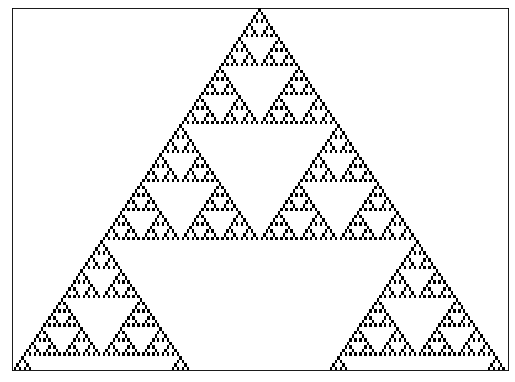

In [18]:
# este es el ejercicio para un arreglo o una grafica
rule = 154
n = 100
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer = CADrawer()
drawer.draw(ca)
drawer.show()

In [19]:
class MosaicCADrawer(object):
    def __init__(self,time_steps):
        self.rows = 26
        self.cols = 10
        self.time_steps = time_steps
    def draw(self):
        fig, ax = plt.subplots(self.rows, self.cols, figsize=(100, 80), sharey=True)
        for row in range(self.rows):
            for col in range(self.cols):
                rule = row * self.cols + col
                if rule <= 255:
                    ca_universe = getEvolvedCA(rule, self.time_steps)
                    
                    ax[row, col].imshow(-ca_universe)
                    ax[row, col].set_label(rule)
                
                ax[row, col].set_xticks([])
                ax[row, col].set_yticks([])

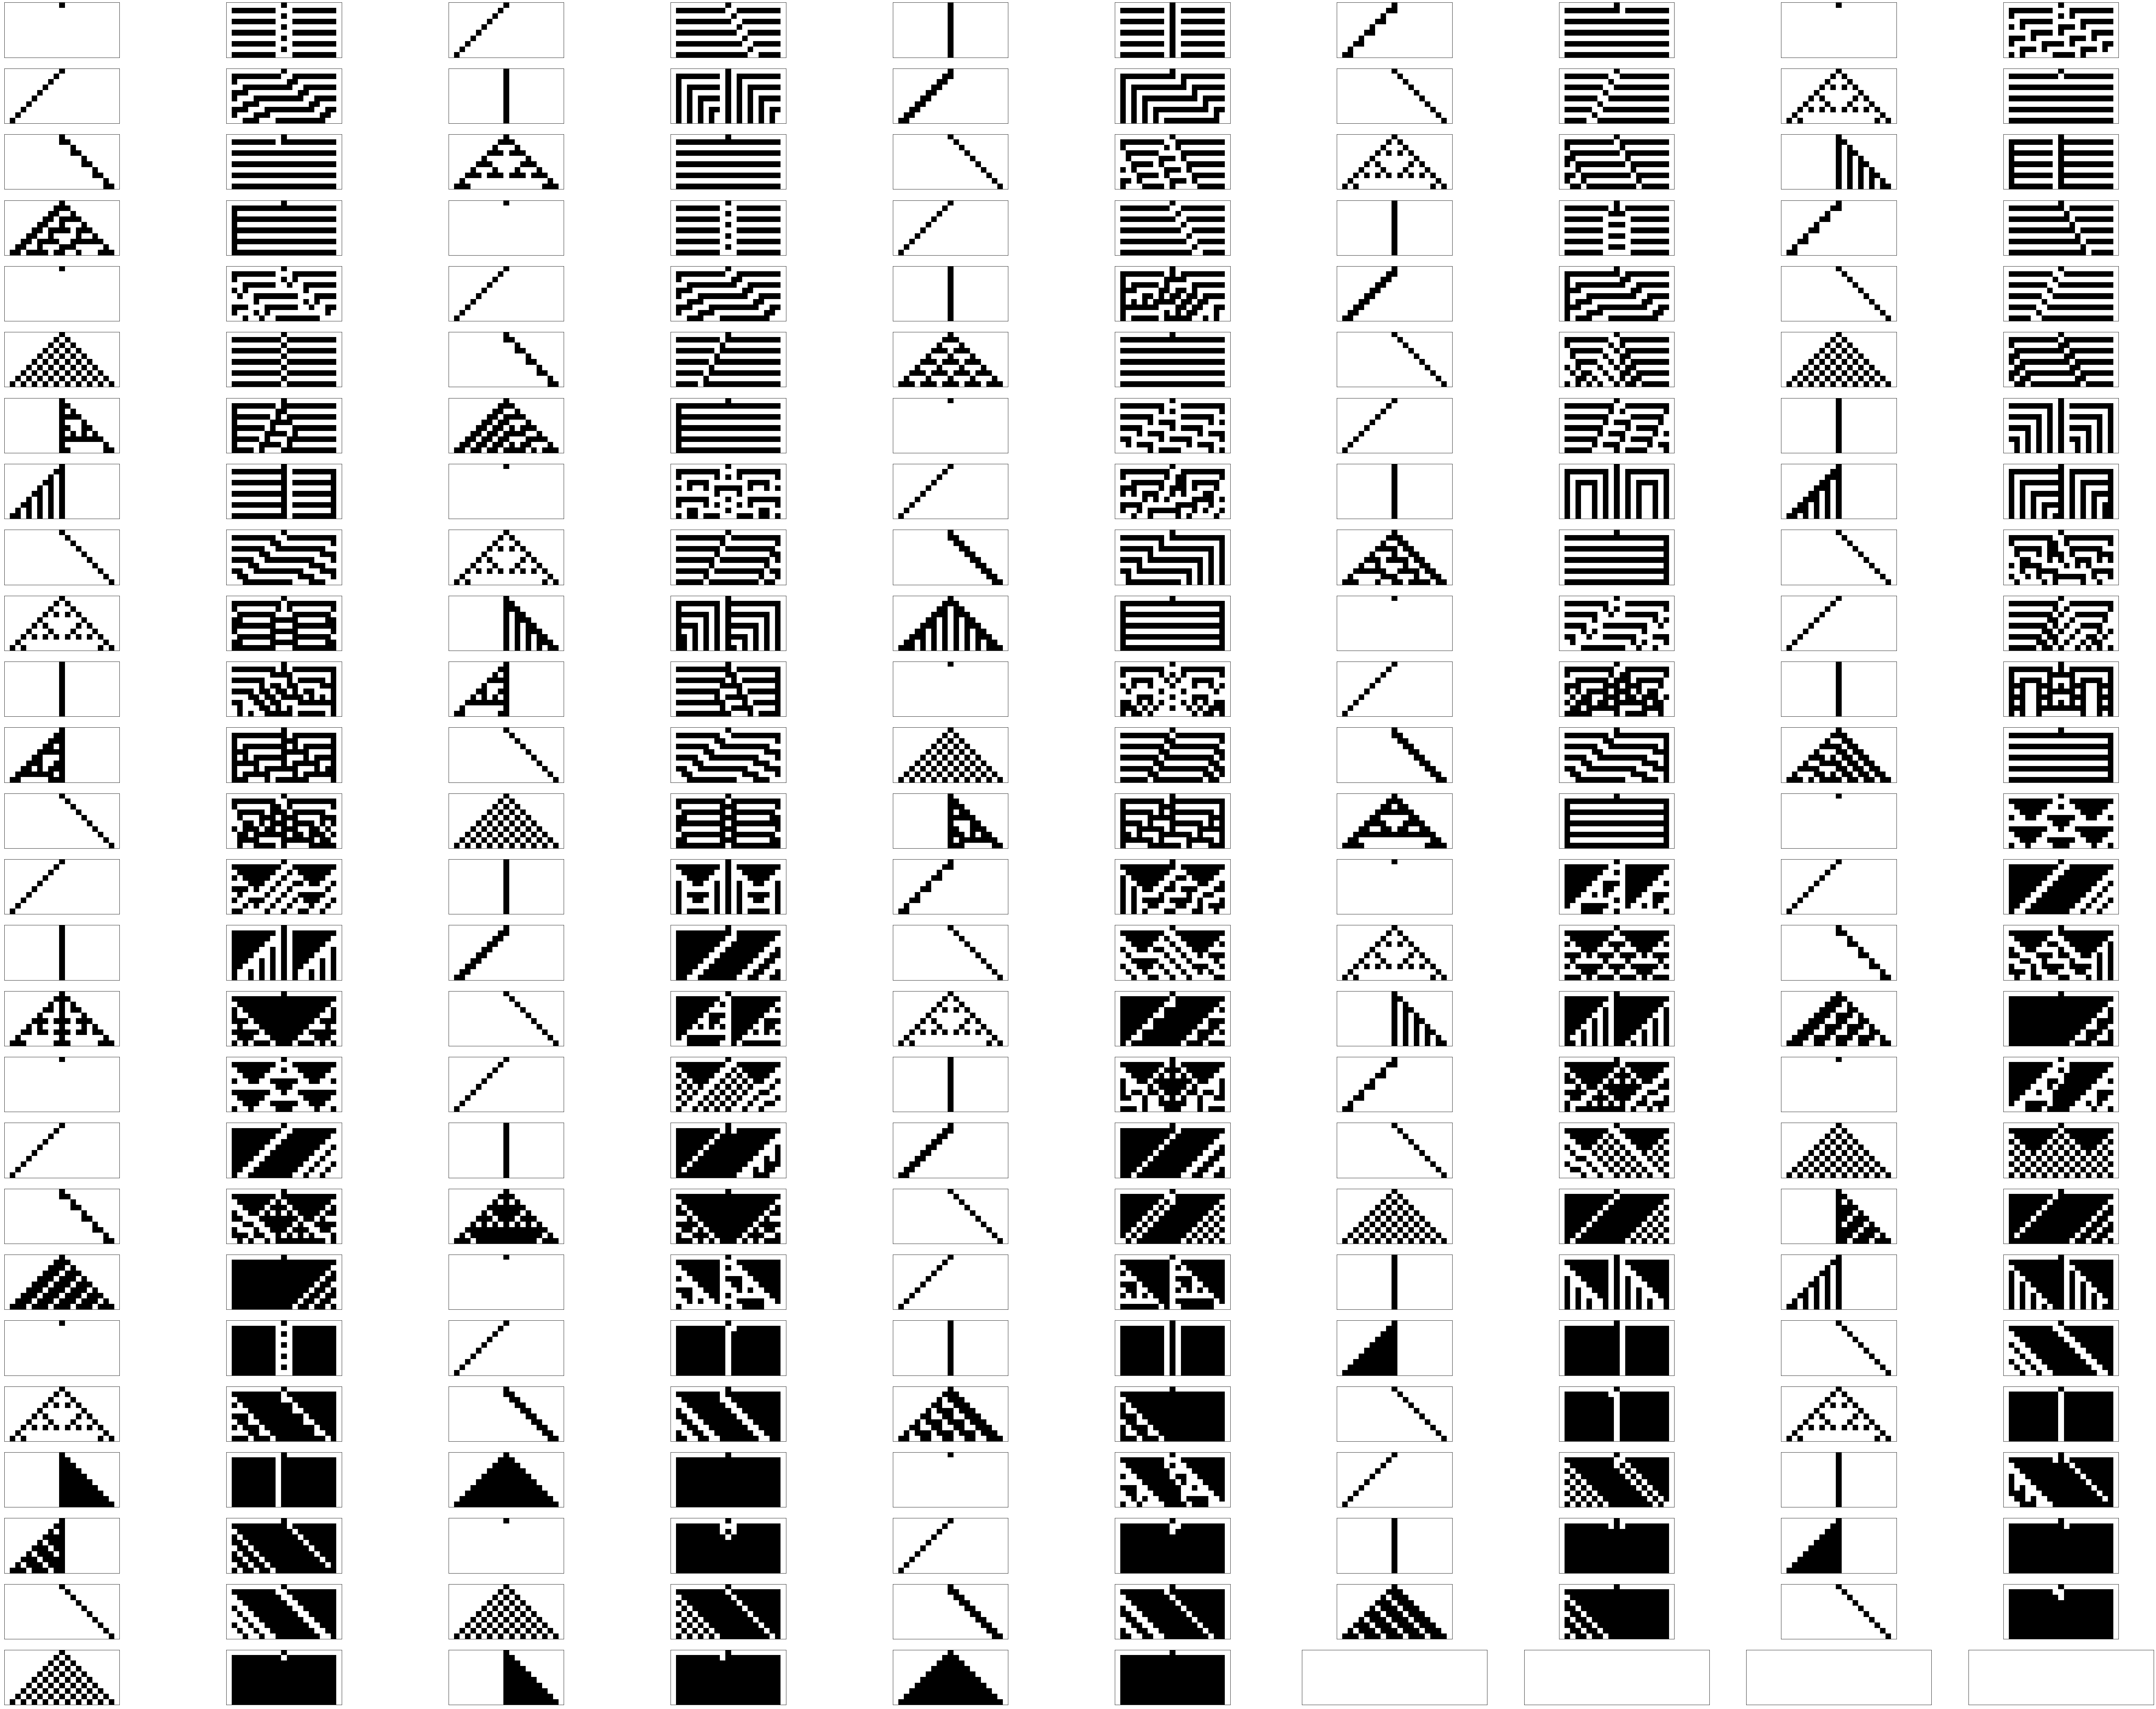

In [21]:
ca_drawer = MosaicCADrawer(10)
ca_drawer.draw()

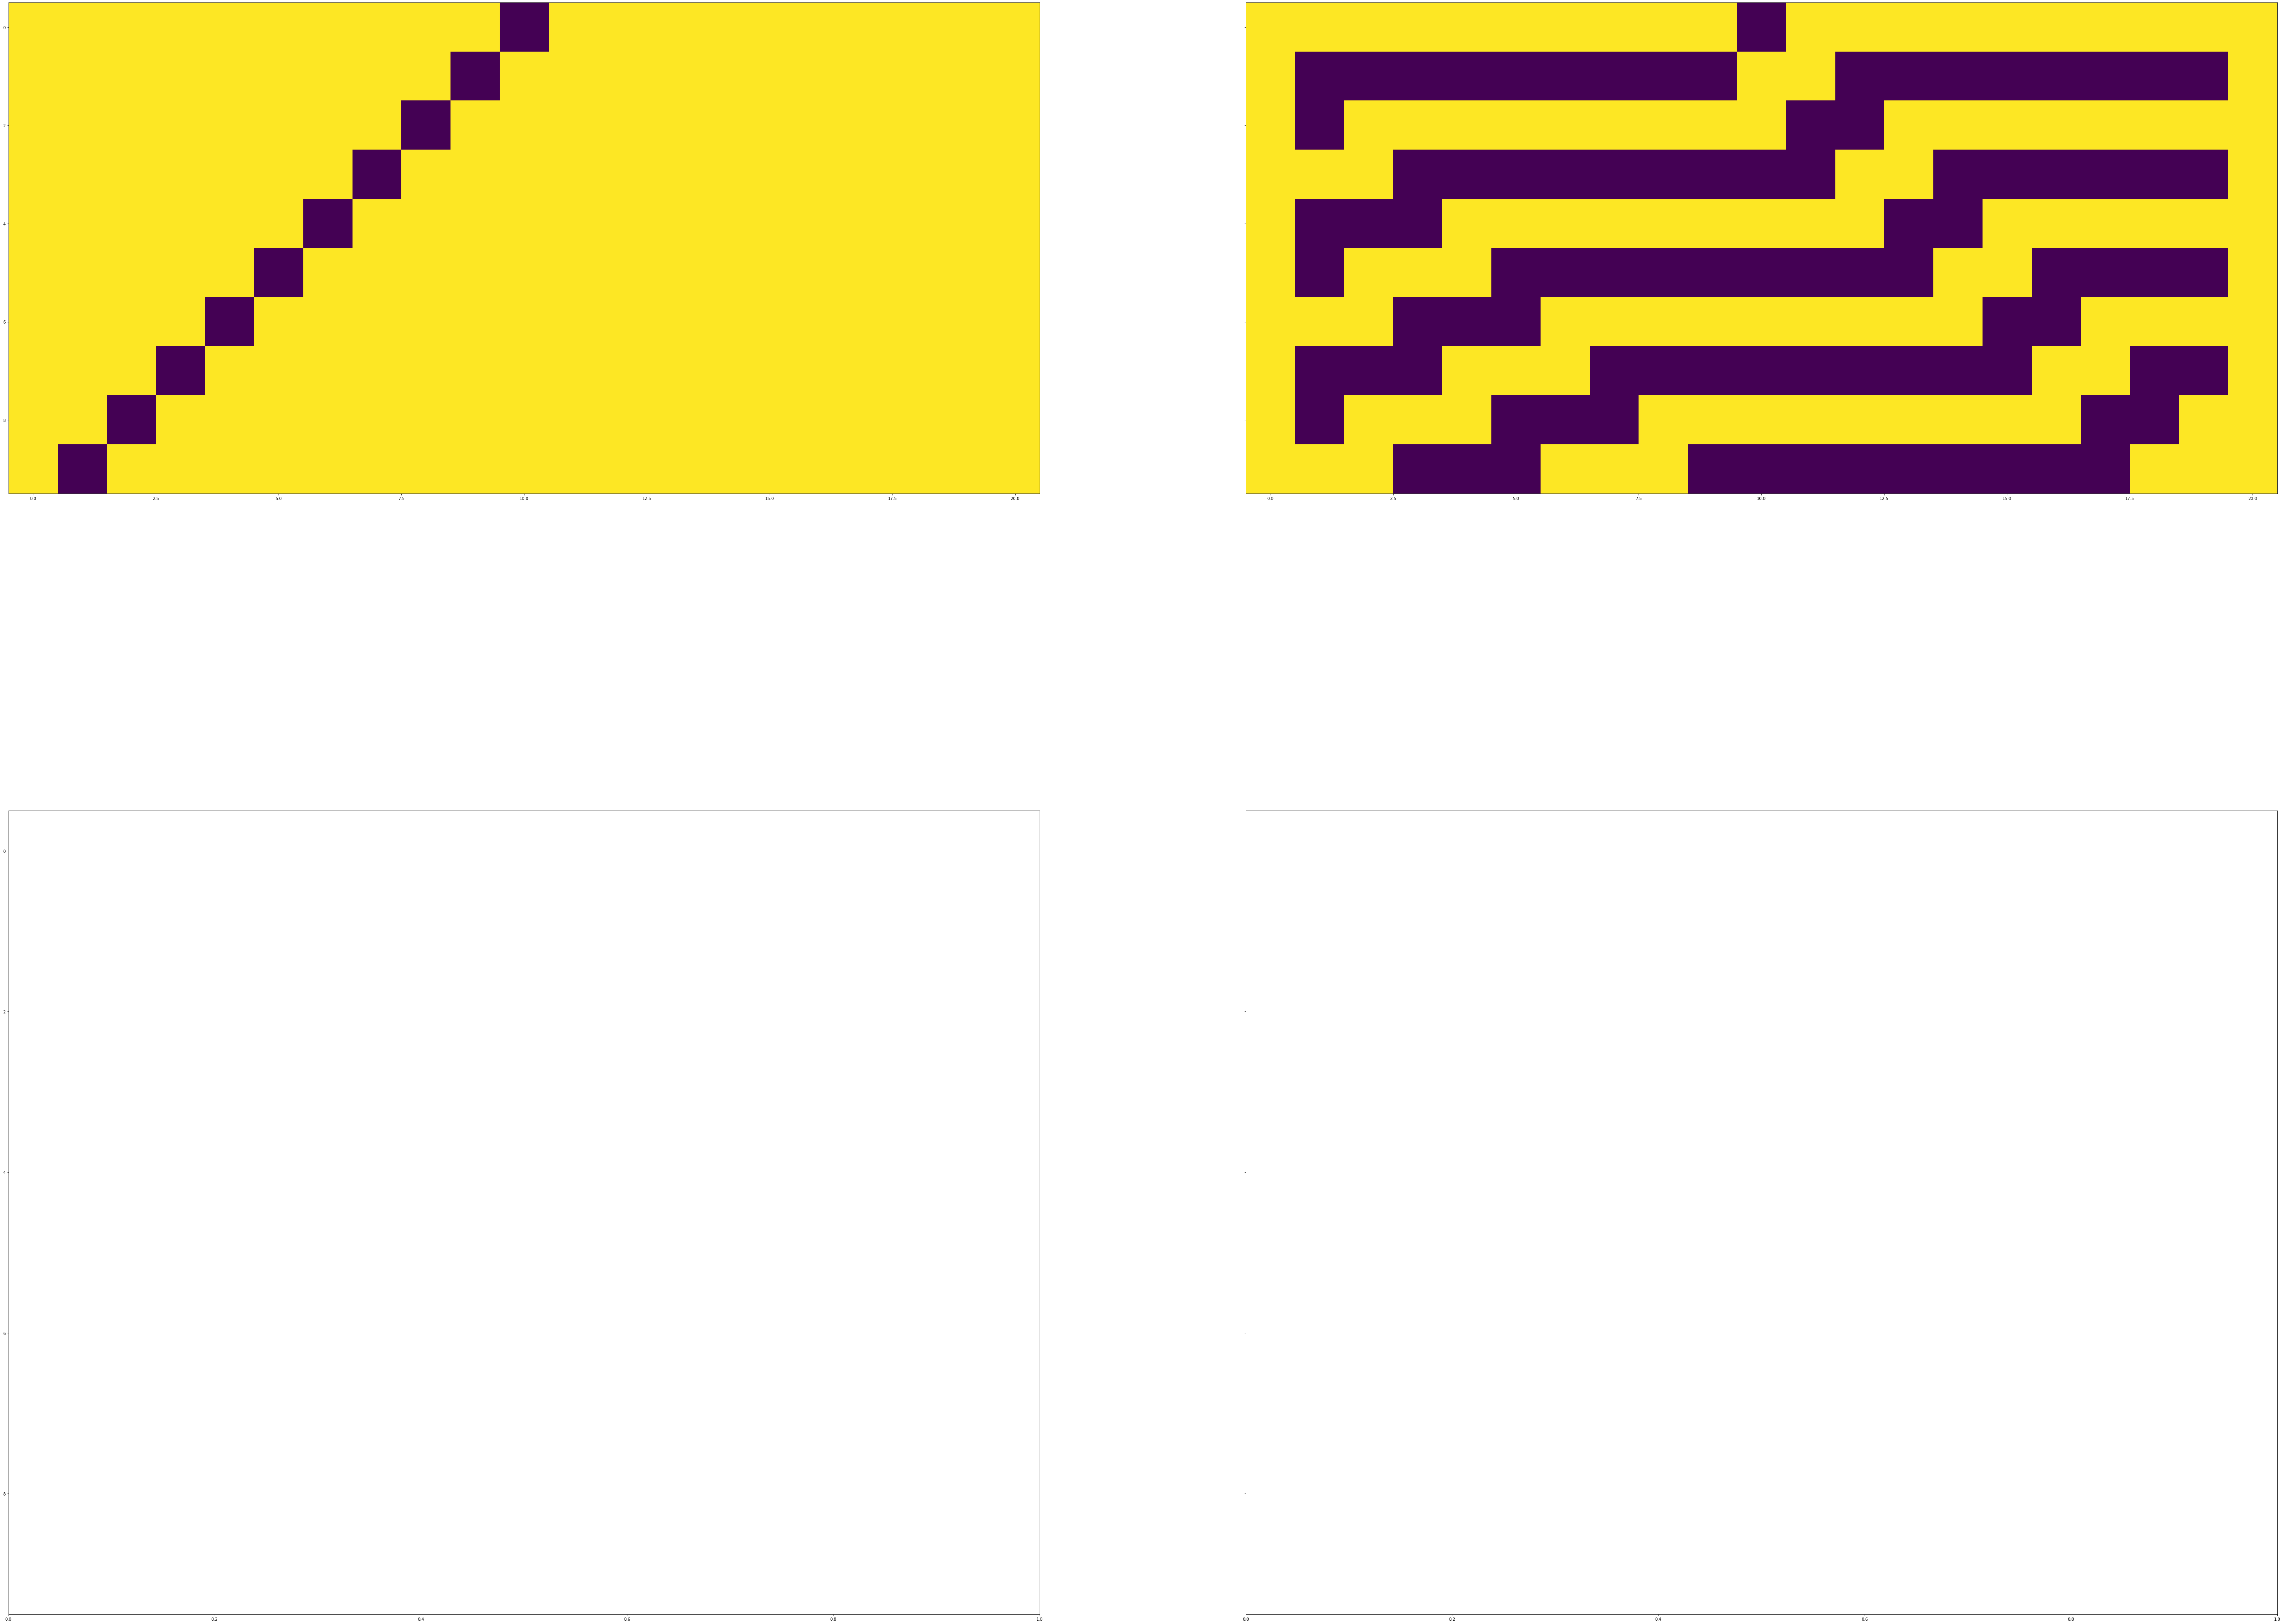

In [32]:
# practica para hacer solo 2 graficas y asi hacer mas
fig,ax=plt.subplots(2,2,figsize=(100,80), sharey=True)
universe = getEvolvedCA(10,10)
ax[0,0].imshow(-universe)
universe=getEvolvedCA(11,10)
ax[0,1].imshow(-universe)

<div class="alert alert-info">
    
**Ejercicio:** La página de la [wikipedia](http://en.wikipedia.org/wiki/Cellular_automaton#Classification) menciona 4 clasificaciones ¿Puedes identificarlos en tu gráfica?
</div>

<div class="alert alert-info">
    
<font color=red>**Ejercicio:**</font> Escribe una animación interactiva en la cual, reciba la regla, el intervalo del tiempo y con eso la vaya dibujando de manera animada.
</div>

In [45]:
class MosaicCADrawer2:
    def __init__(self, time_steps, rules):
        self.rows = 26
        self.cols = 10
        self.time_steps = time_steps
        self.rules = rules
    def draw(self):
        fig, ax = plt.subplots(self.rows, self.cols, figsize=(100, 80), sharey=True)
        for row in range(self.rows):
            for col in range(self.cols):
                rule = row * self.cols + col
                if rule <= self.rules:
                    ca_universe = getEvolvedCA(rule, self.time_steps)
                    
                    ax[row, col].imshow(-ca_universe)
                    ax[row, col].set_label(rule)
                
                ax[row, col].set_xticks([])
                ax[row, col].set_yticks([])



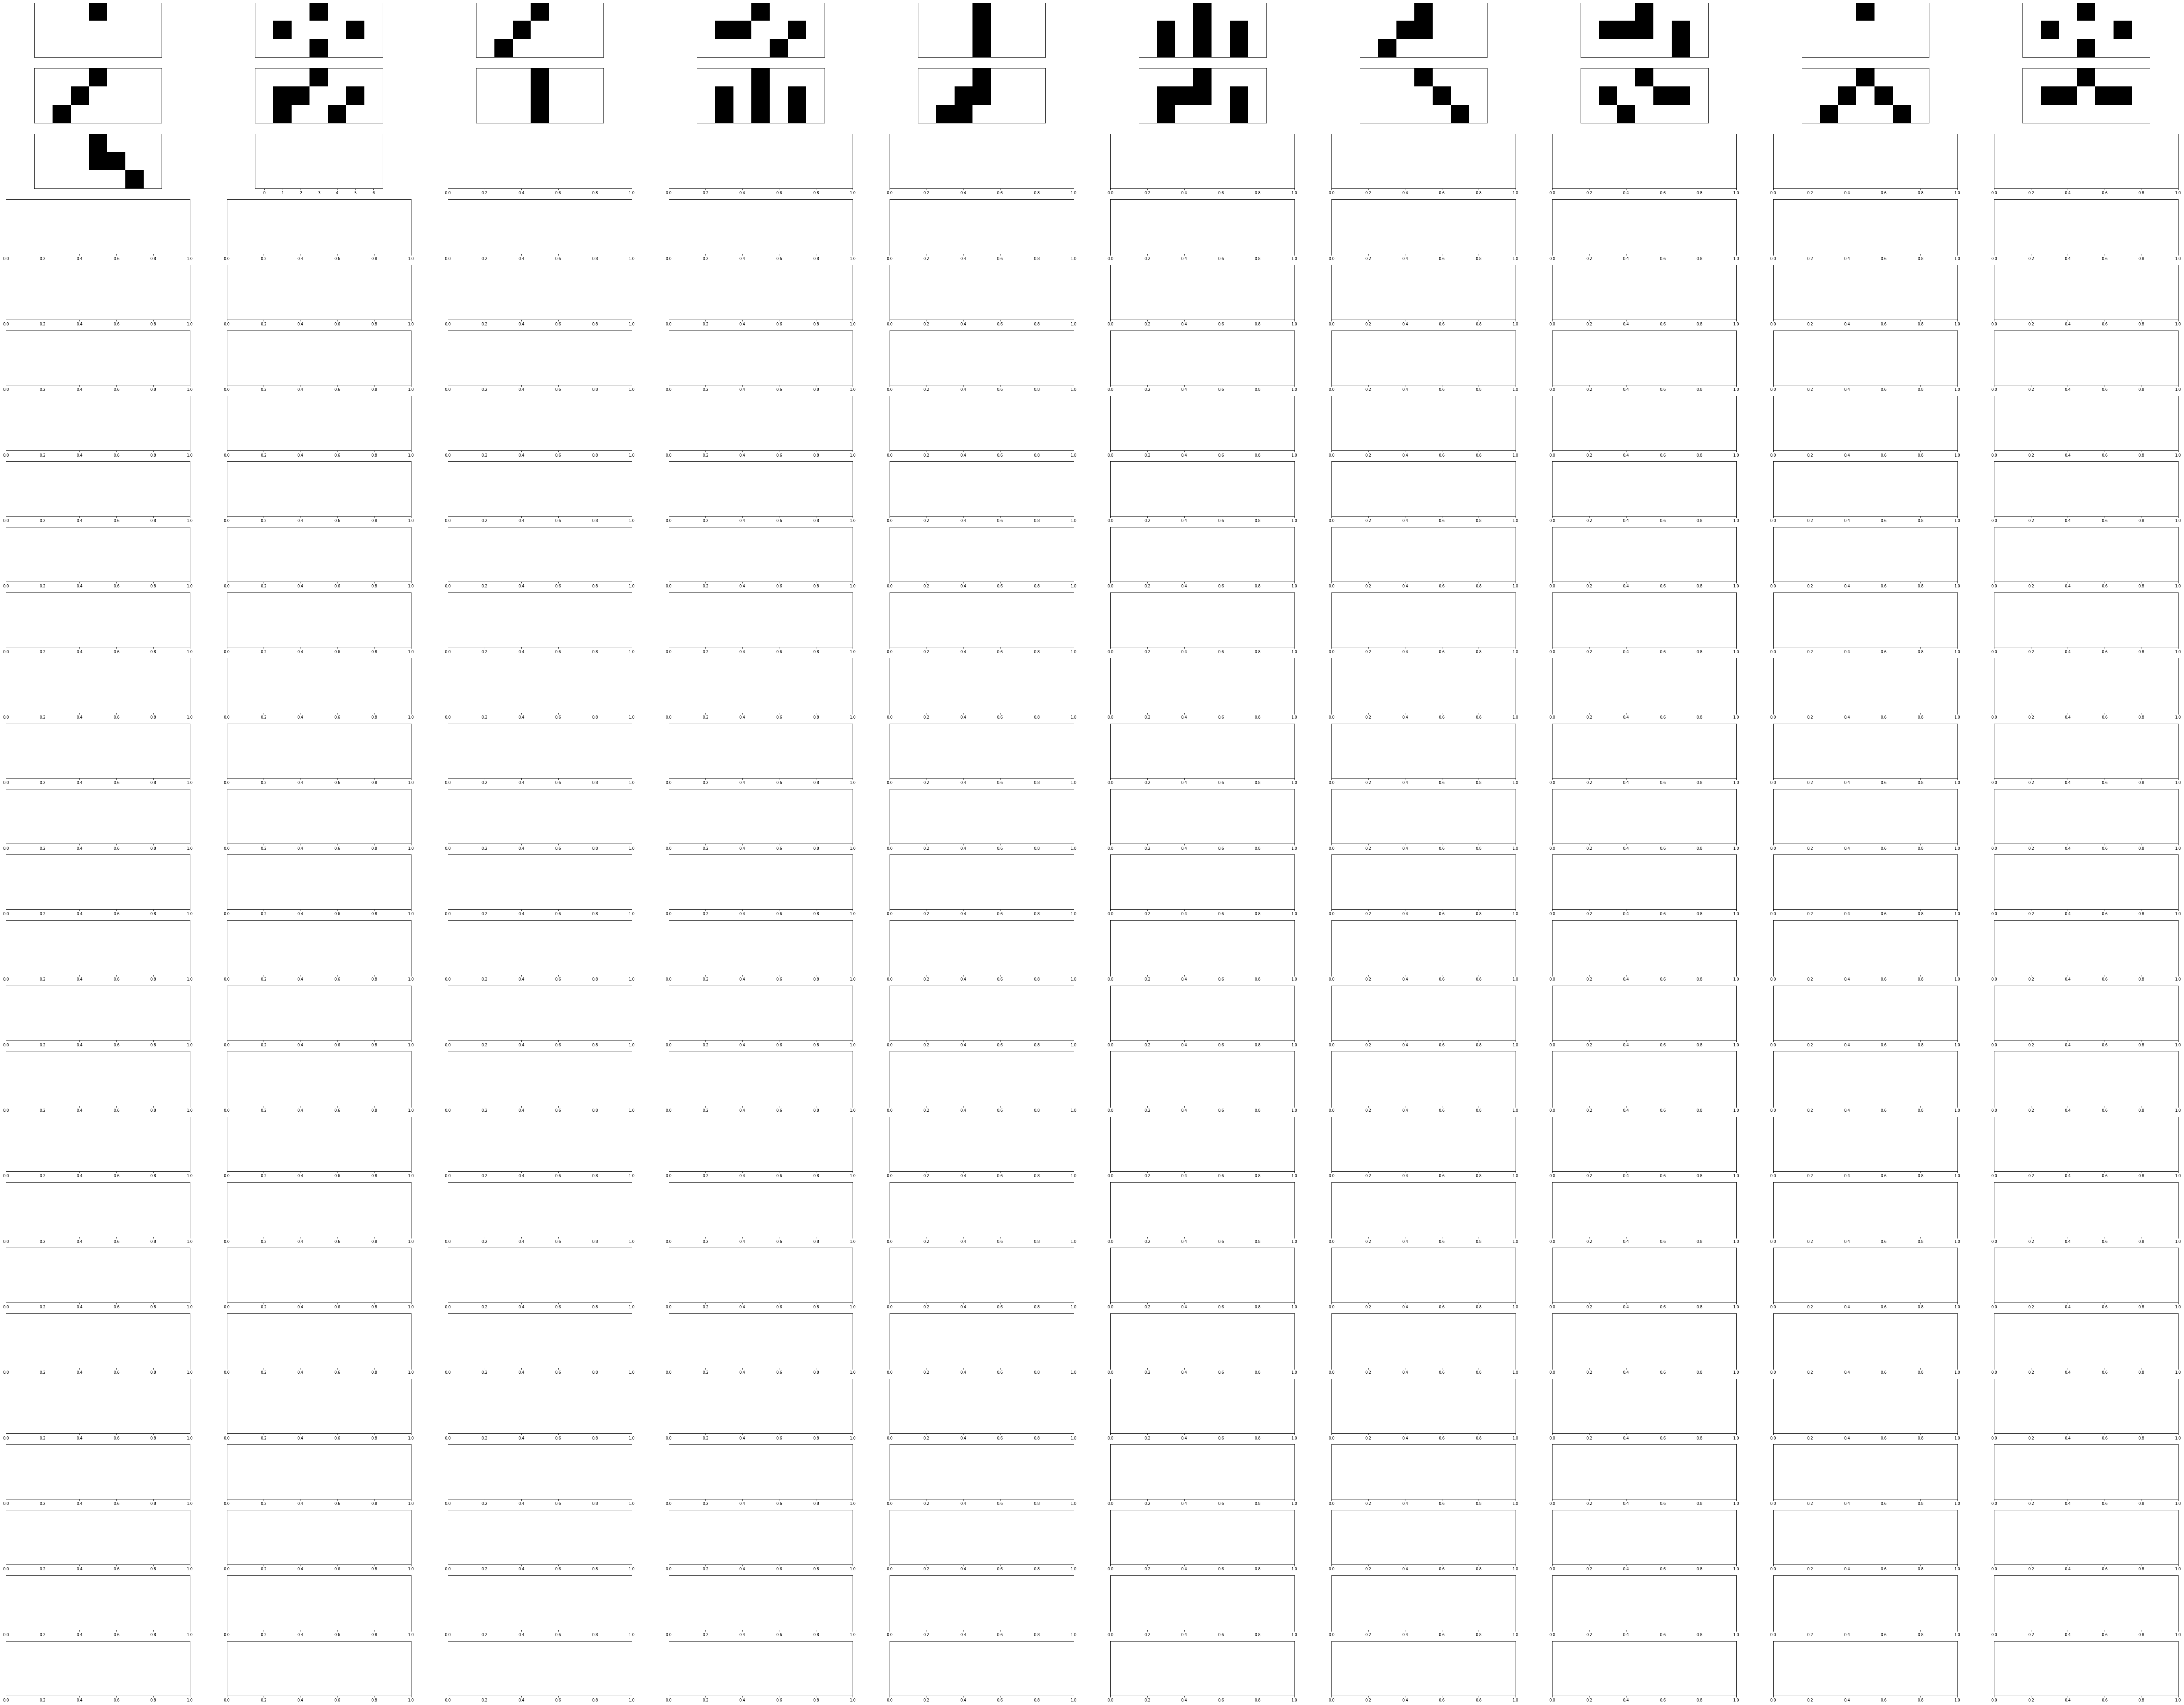

interactive(children=(IntSlider(value=10, description='time', max=30, min=-10), IntSlider(value=255, descripti…

<function __main__.interactivomosaic(time, rules)>

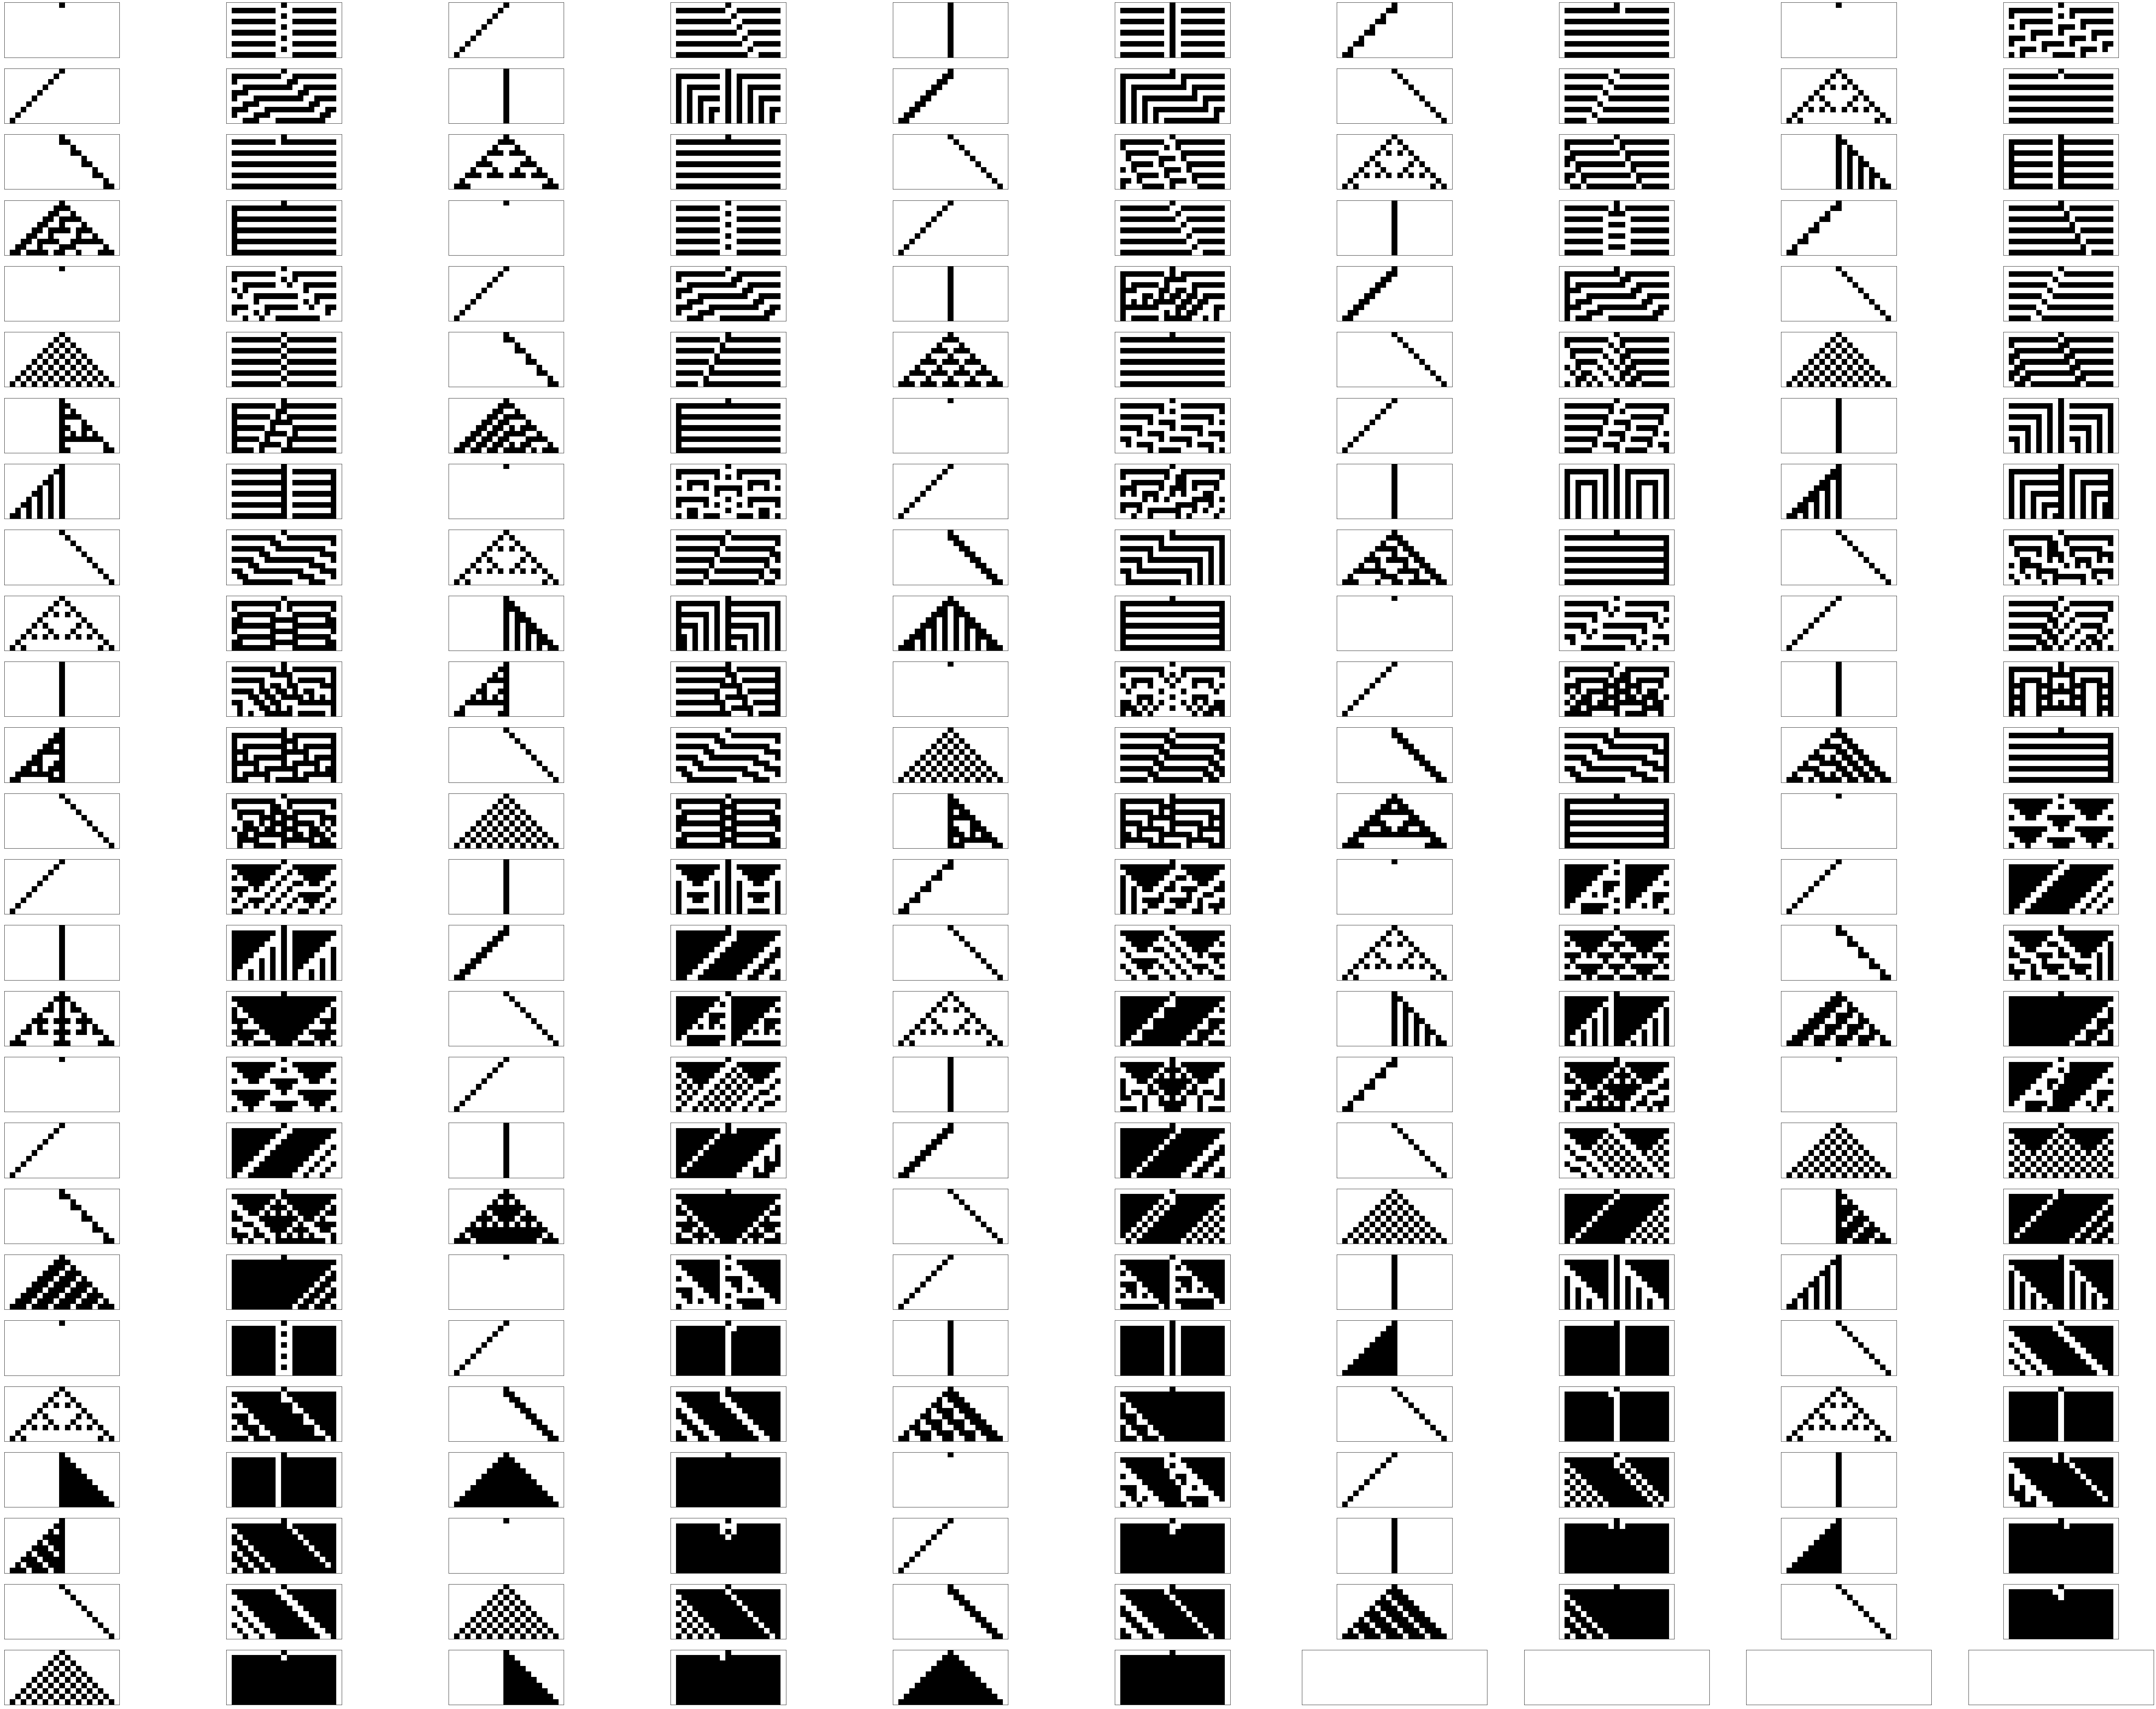

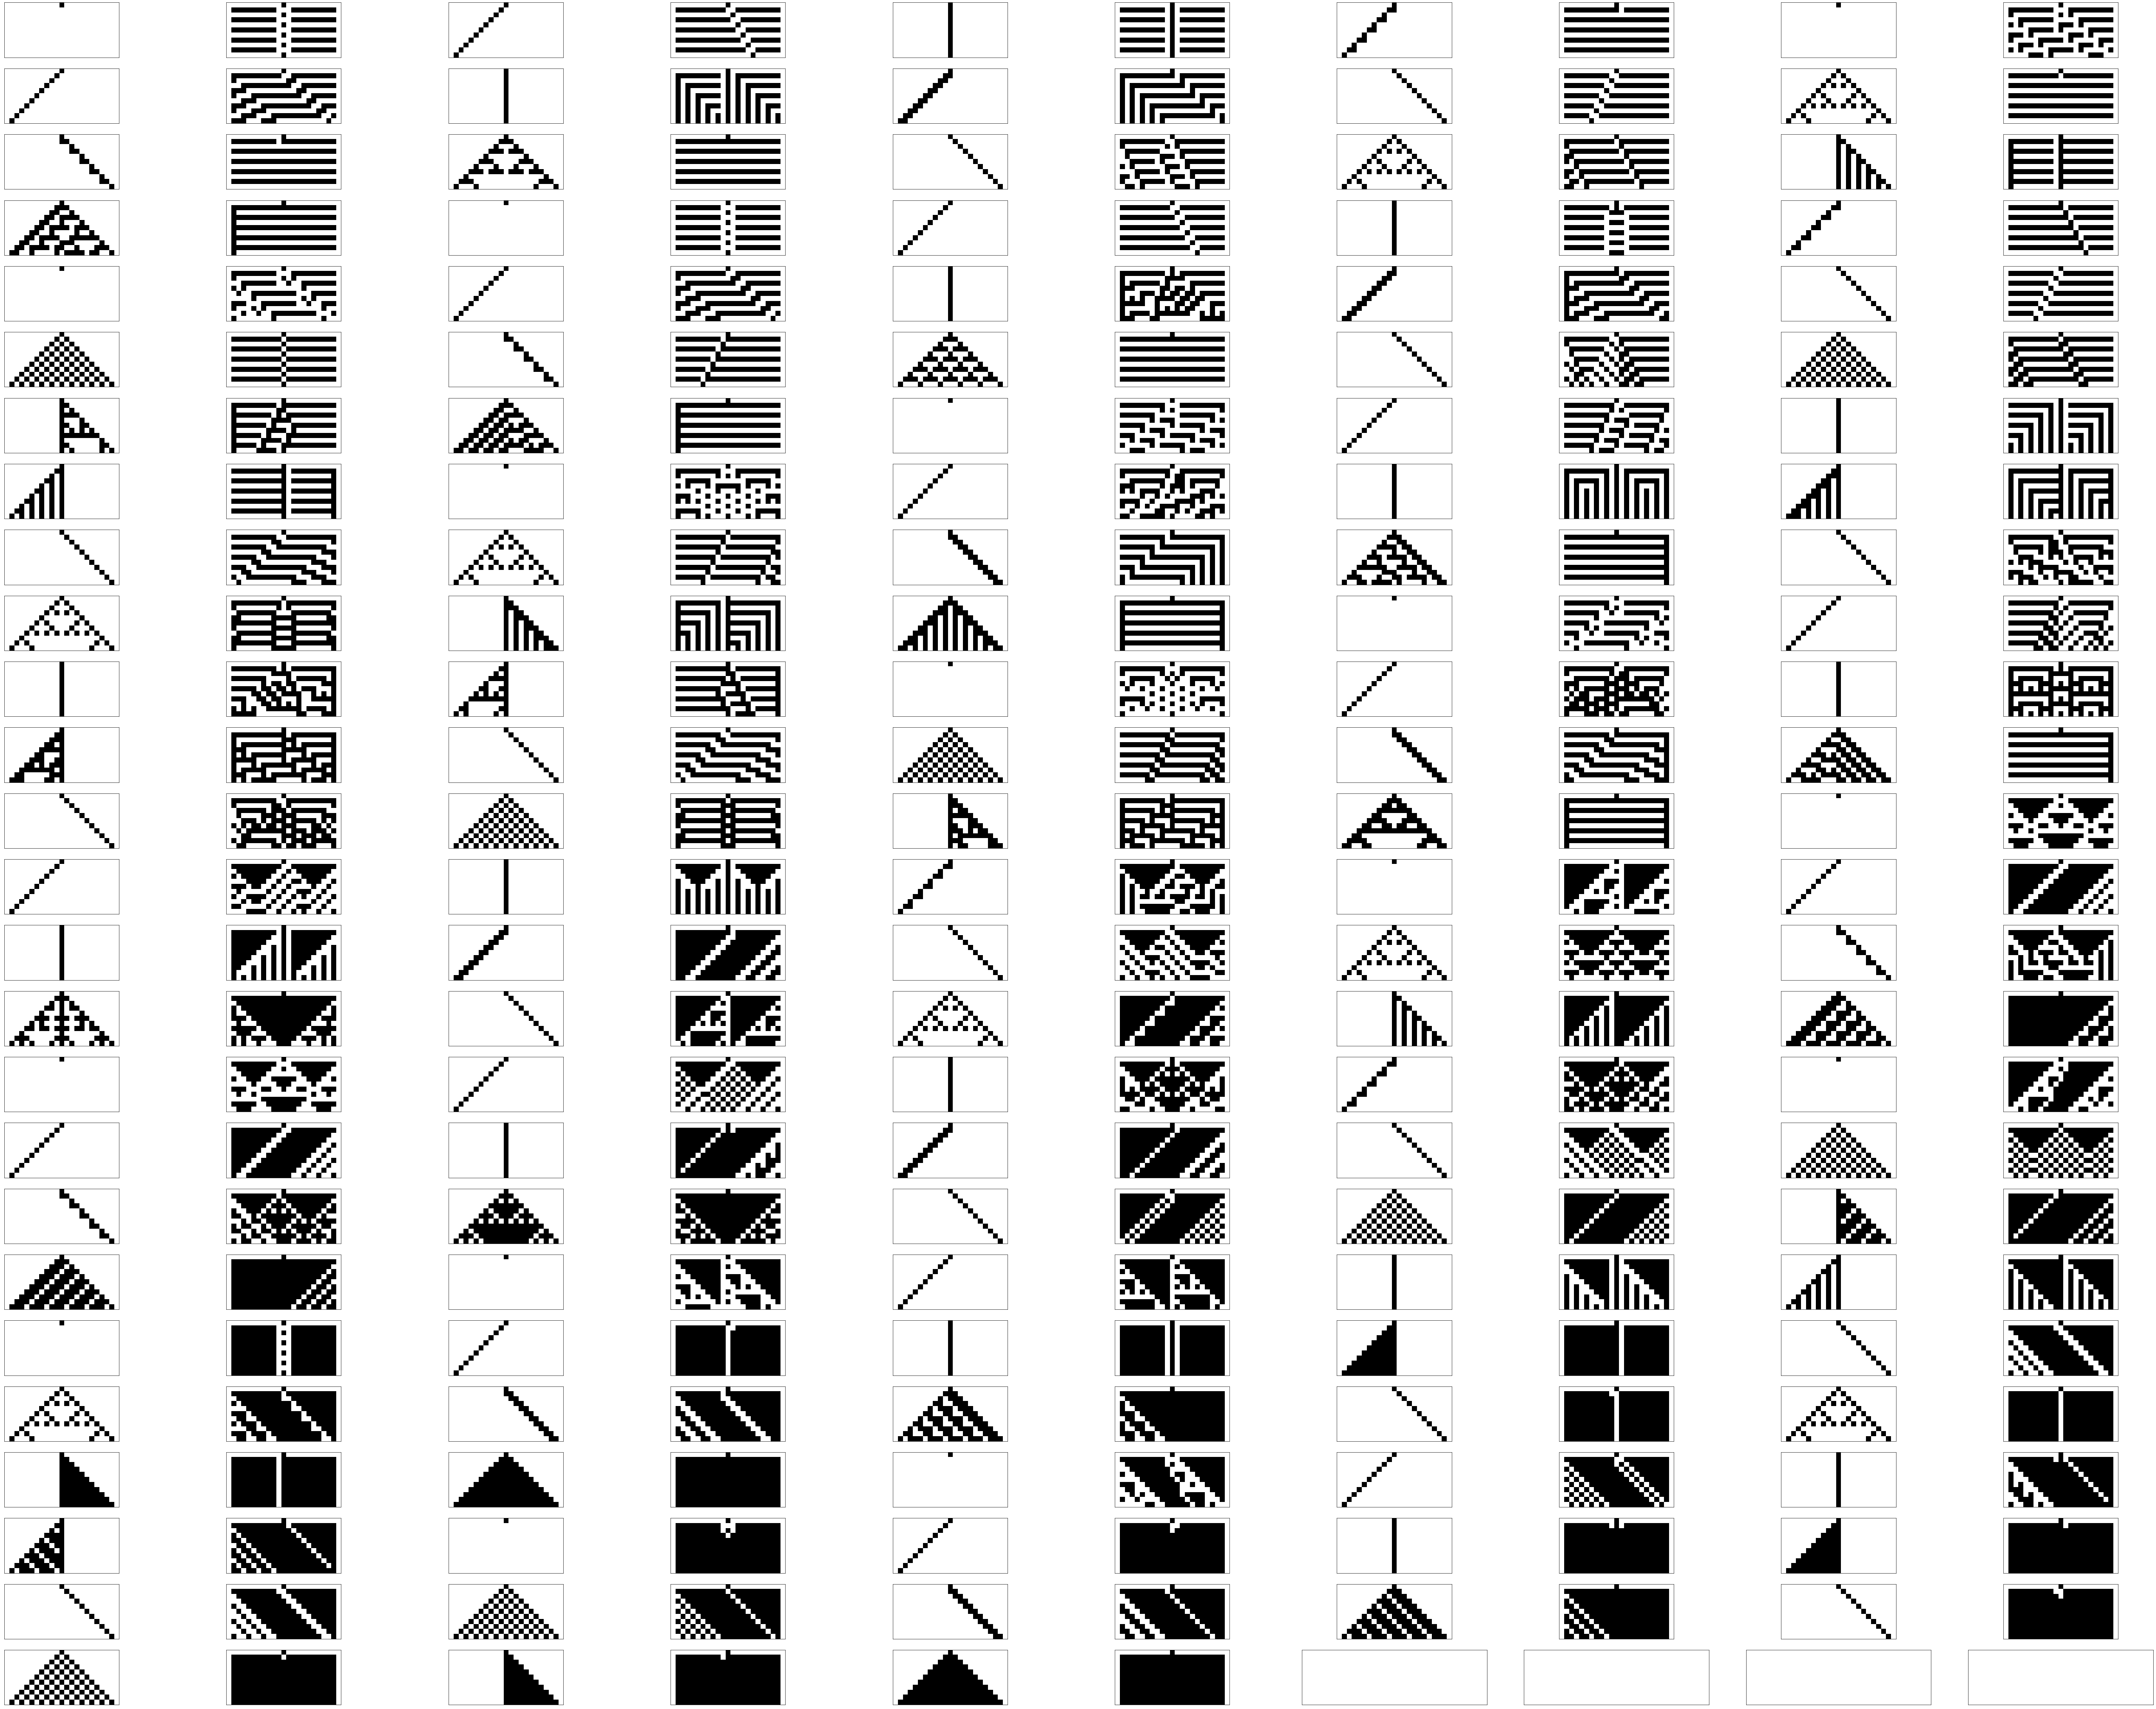

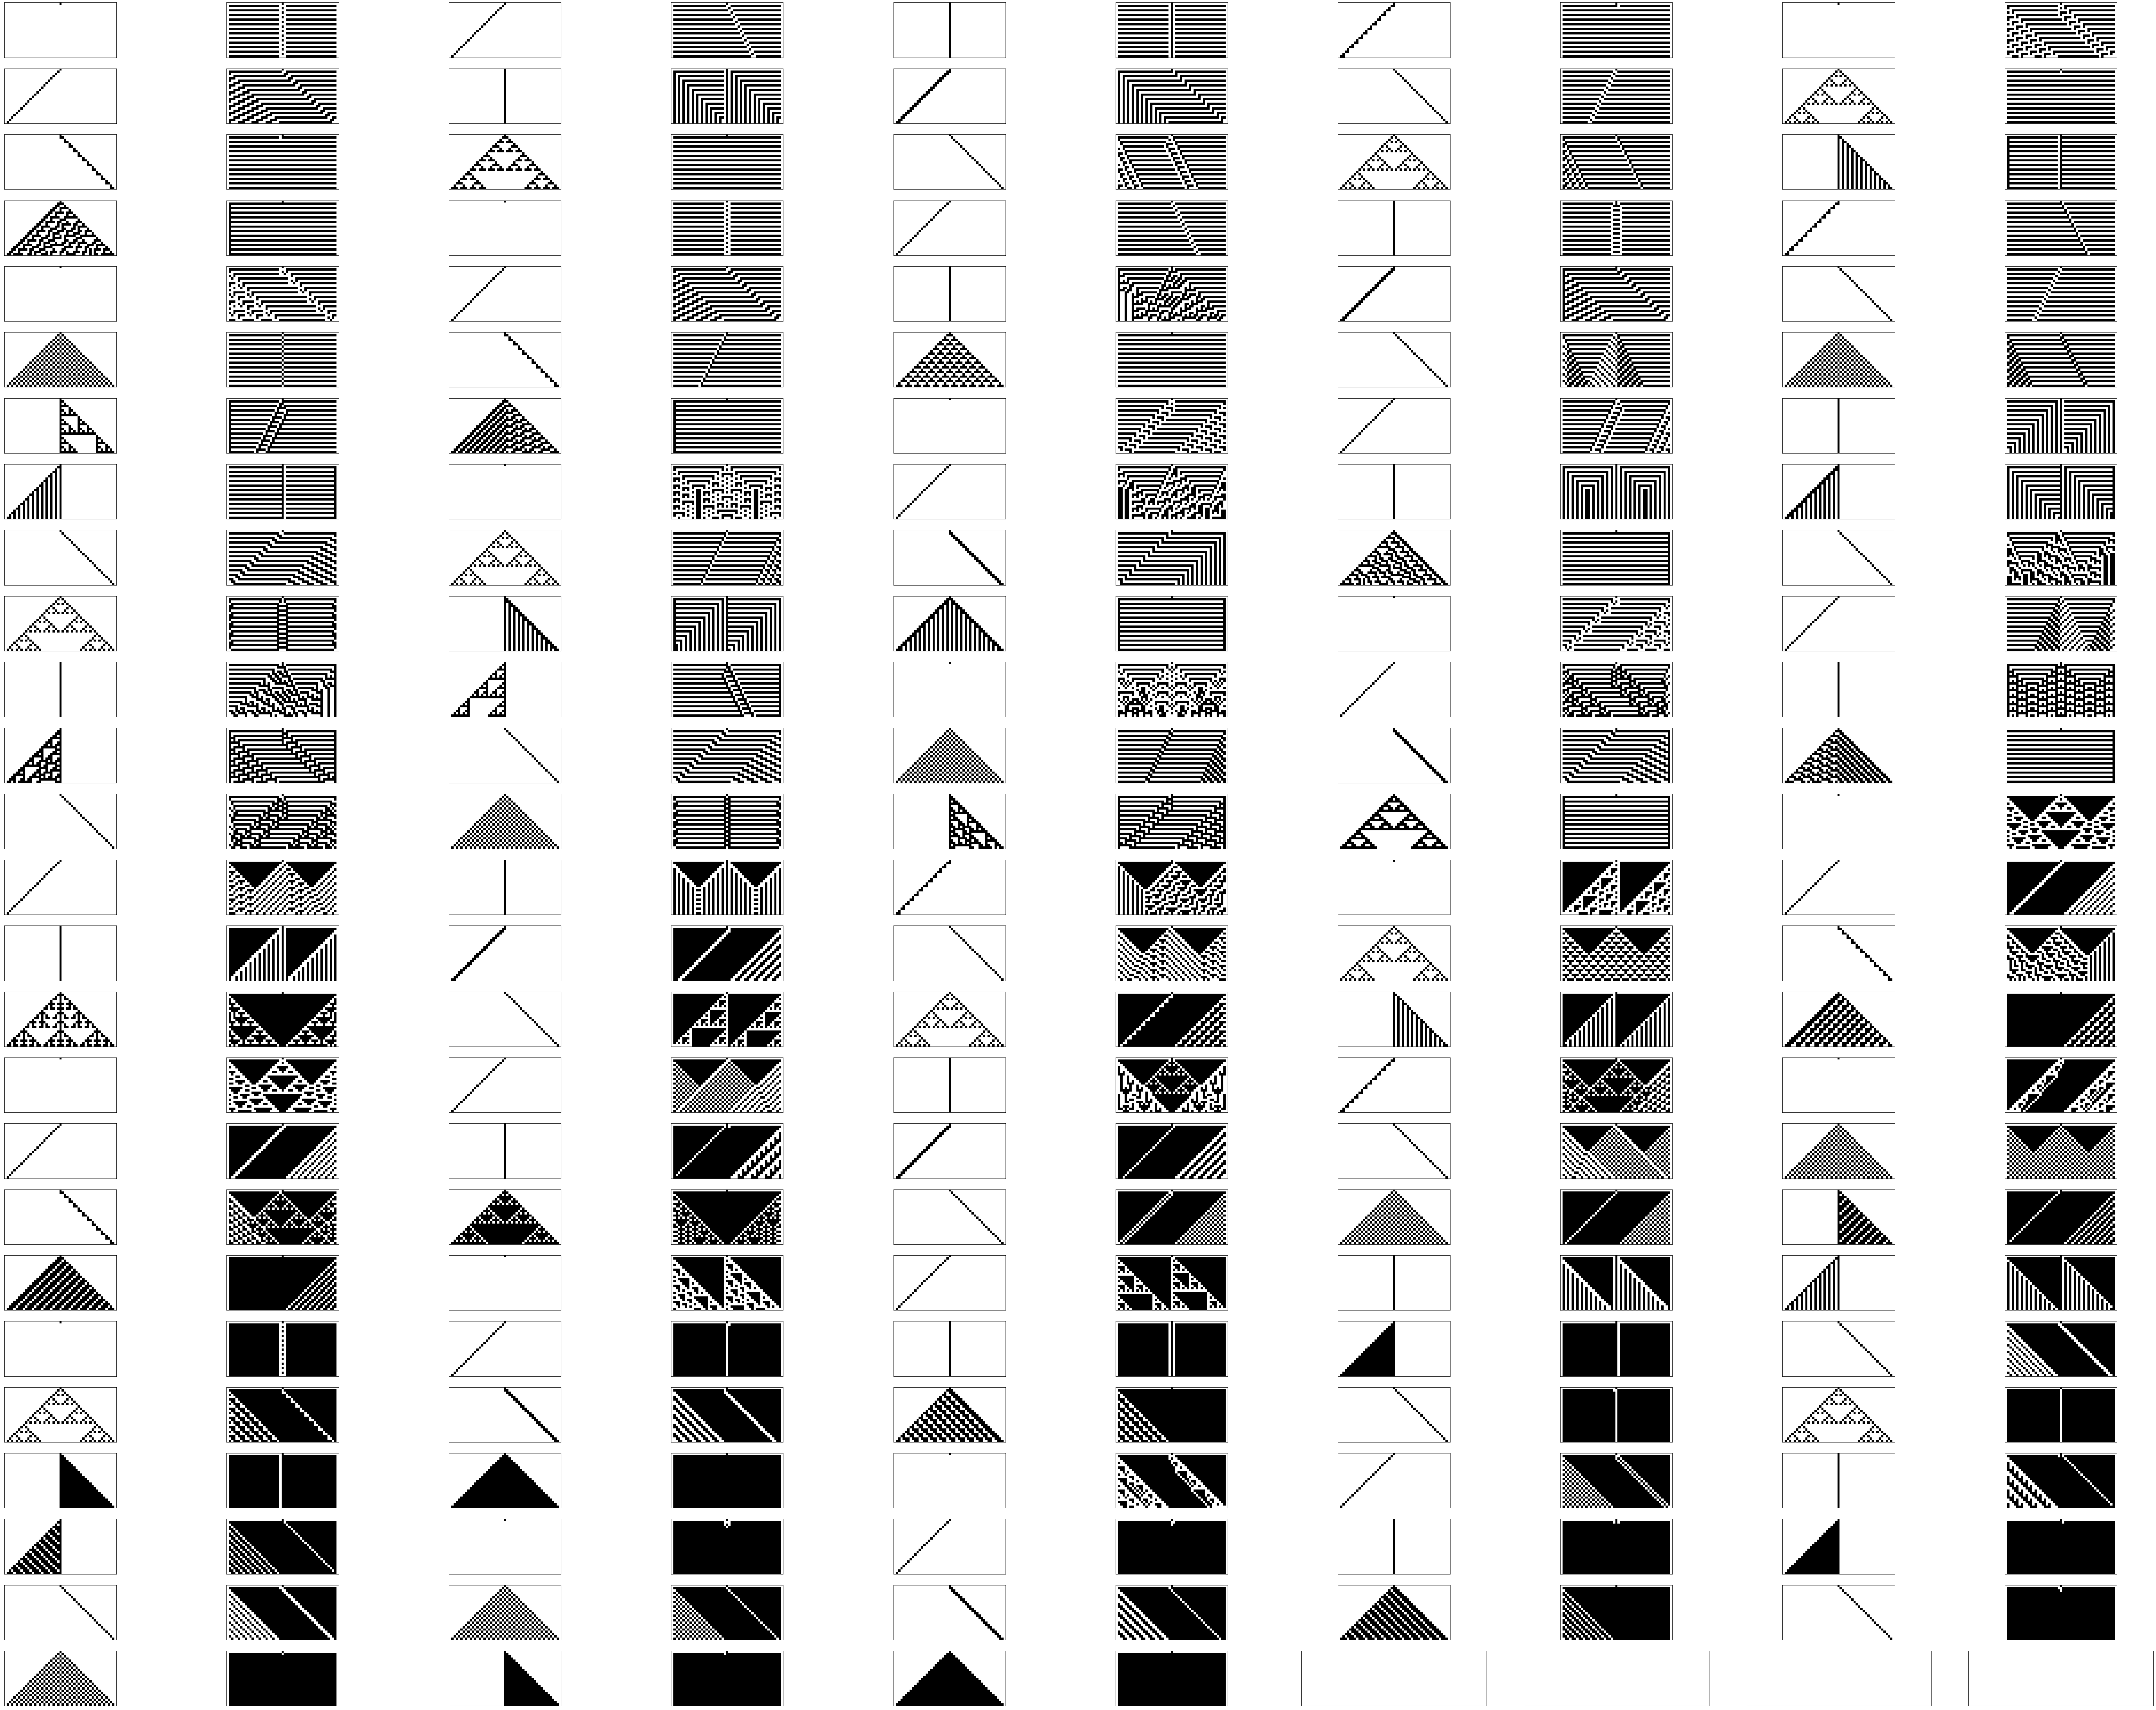

In [62]:
#notar que se hace una función para evaluar la clase con los valores dados
def interactivomosaic(time,rules):
    ca_dra=MosaicCADrawer2(time,rules)
    ca_dra.draw()

interact(interactivomosaic, time = 10, rules = 255)

In [9]:
X = np.loadtxt('edad-Copy1.dat')
Y = np.loadtxt('altura-Copy1.dat')

OSError: altura-Copy1.dat not found.

Text(0, 0.5, 'Altura (m)')

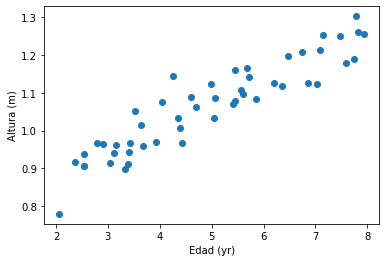

In [13]:
plt.scatter(X,Y, label="data")
plt.xlabel('Edad (yr)')
plt.ylabel('Altura (m)')

Sea  $\textbf{J}(\mathbf\beta_0, \mathbf\beta_1)$ la función que definimos como una variable _ecua1_ 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [11]:
import sys
print(sys.maxsize)

9223372036854775807


In [15]:
2**64/1

1.8446744073709552e+19

In [17]:
x = 1.2e34
x

1.2e+34

In [24]:
y=x*(3 + 4.5e34j)
y

(3.6e+34+5.4e+68j)

In [32]:
y*5 + 2.1e69j

(1.8e+35+4.8e+69j)

<div class="alert alert-info">
    
**<font color='red'>Ejercicio</font>**

Calcula el valor de la suma $\sum^{1000}_{k=0} \left(\frac{1}{k}\right)^2$.
</div>

In [36]:
a=0 #usando for o bucles
for i in range(1,1001):
    a+=(1/i)**2
print(a)

1.6439345666815615


In [22]:
sum([(1/k)**2 for k in range (1,1000)]) #un renglon con funcion suma

1.6439335666815602

In [28]:
a_list=[1,2,3,4,5]

In [27]:
another_l=[3+2j,"de",79,3.5]

In [41]:
a_list.pop()

5

In [42]:
a_list.pop()# quita el ultimo elemento de la lista

4

In [60]:
a_list

[53, 38, 3, 9, 5, 1, 38]

In [44]:
#funcion binaria
bin(89)

'0b1011001'

In [45]:
# pasar a texto
str()

''

In [47]:
a_list[0:2] # no incluye el ultimo pero si el primero

[1, 2]

In [53]:
a_list.append(1) # agrega otro en ultimo lugar

In [29]:
a_list.extend(another_l)#agrega los elementos de otra lista
a_list.append(another_l)# agrega una lista como elemento
a_list

[1, 2, 3, 4, 5, (3+2j), 'de', 79, 3.5]

In [59]:
a_list[0] = 53 #cambia uno por otro

In [61]:
a_list.remove(3) #quita el primer 3

In [63]:
for i in range(9):  #notar que no incluye el 9 pero toma valores desde cero, hay 9 elemntos
    print(i)

0
1
2
3
4
5
6
7
8


In [67]:
S = [x**2 for x in range(11)]
V = [2**x for x in range(13)]
M = [x for x in S if x%2 != 0] # signo de diferente
print(S)
print(V)
print(M)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[1, 9, 25, 49, 81]


In [68]:
transformacion = [[w.upper(), w.lower(), len(w)] for w in palabras] #a cada palabra le aplica las 3 cosas

NameError: name 'palabras' is not defined

In [71]:
n = 25 # define varios for que cumplan que cumplen en simultaneo a cada eleccion
[(x, y, z) for x in range(1, n) for y in range(x, n) for z in range(y, n) if x*x + y*y == z*z]

[(3, 4, 5), (5, 12, 13), (6, 8, 10), (8, 15, 17), (9, 12, 15), (12, 16, 20)]

In [30]:
diccionario = {'a':1, 'b':2, 'coral': 'amarillo'}
diccionario.keys()

dict_keys(['a', 'b', 'coral'])

In [31]:
diccionario["coral"]

'amarillo'

In [32]:
diccionario["colores"]="verde","azul" # agrega elementos a un diccinario

In [85]:
diccionario.items() #pendiente cómo iterar

dict_items([('a', 1), ('b', 2), ('coral', 'amarillo'), ('colores', ('verde', 'azul'))])

# varias formas de iterar

In [40]:
for i in diccionario.items(): 
    print(i)

('b', 2)
('coral', 'amarillo')
('colores', ('verde', 'azul'))


In [42]:
[i for i in diccionario.values()]

[2, 'amarillo', ('verde', 'azul')]

In [38]:
[f'{i},{j}' for i,j in diccionario.items()]

['b,2', 'coral,amarillo', "colores,('verde', 'azul')"]

In [33]:
del diccionario["a"] #elimina de otra forma

In [93]:
diccionario.popitem() #elimina el ultimo argumento

('coral', 'amarillo')

In [94]:
diccionario.pop("b") #elimina uno seleccionado

2

In [1]:
import numpy as np#funciones matematicas

foo **<font color='red'>bar</font>** foo

<div class="alert alert-info">

**<font color='red'> Ejercicio</font>**

Crea una función que devuelva las coordenadas $(x,y,z)$ a partir de las [coordenadas esféricas](http://en.wikipedia.org/wiki/Spherical_coordinate_system) $(r, \theta, \phi)$. Guárdala a disco, en el archivo `transformaciones.py`
</div>    

In [2]:
#%%file transformaciones.py
def cilindro(r,theta,fi):
    x=r*np.sin(theta)*np.cos(fi)
    y=r*np.sin(fi)*np.sin(theta)
    z=r*np.cos(theta)
    return x,y,z

In [3]:
cilindro(2,np.pi,2*np.pi)

(2.4492935982947064e-16, -5.99903913064743e-32, -2.0)

<div class="alert alert-info">

**<font color='red'> Ejercicio</font>**

Usando la función recién creada, usa la librería `interact` para pedir los valores $(r,\theta,\phi)$.

In [60]:
from ipywidgets import interact, fixed, widgets #para poder usar los graficos

In [61]:
!cat transformaciones.py #solo muestra el archivo
%load transformaciones.py #carga el archivo

def cilindro(r,theta,fi):
    x=r*np.sin(theta)*np.cos(fi)
    y=r*np.sin(fi)*np.sin(theta)
    z=r*np.cos(theta)
    return x,y,z


ValueError: 'transformaciones.py #carga el archivo' was not found in history, as a file, url, nor in the user namespace.

In [6]:
interact(cilindro,r=2,theta=np.pi/2,fi=np.pi) #fixed deja valor fijo

interactive(children=(IntSlider(value=2, description='r', max=6, min=-2), FloatSlider(value=1.5707963267948966…

<function __main__.cilindro(r, theta, fi)>

In [17]:
cadena = u"Esto es una cadena de texto con acentos y otros símbolos UTF-8 ¿?¡!"
cadena

'Esto es una cadena de texto con acentos y otros símbolos UTF-8 ¿?¡!'

In [20]:
print(cadena.capitalize()) #Primera mayuscula

Esto es una cadena de texto con acentos y otros símbolos utf-8 ¿?¡!


In [19]:
print(cadena.replace(" ","")) #quita espacios entre palabras \n enter, \t tab enmedio

EstoesunacadenadetextoconacentosyotrossímbolosUTF-8¿?¡!


In [45]:
for i in range(5):
    print("%d \t %s" % (i, bin(i))) #son equivalentes d es enteros y s string
    print(f'{i} \t {bin(i)}')

0 	 0b0
1 	 0b1
2 	 0b10
3 	 0b11
4 	 0b100


In [48]:
x=0   #jamas será uno por que arrastra errores en la suma, por eso debe ser un valor cercano
while not x >= 1.0:
    x = x + 0.1
    print("x=%19.17g" % (x))

x=0.10000000000000001
x=0.20000000000000001
x=0.30000000000000004
x=0.40000000000000002
x=                0.5
x=0.59999999999999998
x=0.69999999999999996
x=0.79999999999999993
x=0.89999999999999991
x=0.99999999999999989
x= 1.0999999999999999


In [49]:
import sympy #forma de importar as sym

In [50]:
a=sympy.Symbol("A")

In [51]:
a

A

<div class="alert alert-info">
    
**<font color='red'> Ejercicio</font>** 
    
- Demuestra que $y_1 = e^t$ y $y_2 = t e^t$ son soluciones de la **ODE** $y^{''} -2y^{'} + y = 0$. No uses `dsolve`. Recuerda que tienes que definir los *símbolos* $y$ y $t$.
- Ahora resuelve usando `dsolve`. Recuerda definir la función.
</div>

In [53]:
from sympy import *

In [58]:
y = Function('y')
t = Symbol('t')
y_1=Derivative(y(t),t)
Eq(Derivative(y_1,t)-2*y_1+y(t),0) # tambien se puede concatenar las derivative

Eq(y(t) - 2*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 0)

In [60]:
Derivative(y(t),t,t,t)
dsolve(Derivative(y_1,t)-2*y_1+y(t))

Eq(y(t), (C1 + C2*t)*exp(t))

In [63]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

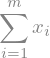

In [66]:
i=Symbol('i')
m=Symbol('m')
Derivative(Sum(Indexed('x',i)*Indexed('b',i),(i,1,m)),Indexed('b',i)).doit()

<div class="alert alert-info">
    
**<font color='red'> Ejercicio:</font>** Resuelva simbólicamente lo siguiente: Se lanza una pelota al aire con una velocidad $v_0$ a un ángulo $\theta$. La gravedad es $g$. 
- ¿Cuál es la altura máxima? 
- ¿Cuál es la distancia máxima?
- ¿Cuál es el tiempo de vuelo?
- De una respuesta numérica, cuando $v_0 = 10 \frac{m}{s}$ y $\theta=\pi/2$.
</div>

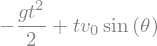

In [68]:
theta,t,g,v0=sympy.symbols('theta,t,g,v_0')
integrate(sin(theta)*v0-g*t,t)

In [69]:
integrate(cos(theta)*v0,t)

In [77]:
y=solve(sin(theta)*v0-g*t,t)[0] #tiempo en la que alcanza altura maxima

In [71]:
diff(v0*cos(theta)*t,t)

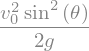

In [78]:
integrate(sin(theta)*v0-g*t,t).subs(t,y)# altura maxima

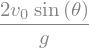

In [79]:
y*2

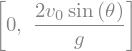

In [80]:
solve(integrate(sin(theta)*v0-g*t,t),t)

In [86]:
solve(integrate(sin(theta)*v0-g*t,t),t)[1].subs(v0,10).subs(theta,3.1415926535/2).subs(g,9.81)

In [ ]:
np.array # da un arreglo pero no admite diferentes tipos de datos, y convierte otros 

In [2]:
lst =  [1,2,3,4,5]
lst

In [3]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [4]:
arr = np.arange(1e7)  #cambia los elementos del array

In [5]:
lst = arr.tolist() #convierte array en lista

In [6]:
lst

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [7]:
arr_1=np.linspace(0,67,10) #le da continuidad a los datos funciona en graficas tambien
arr_1

array([ 0.        ,  7.44444444, 14.88888889, 22.33333333, 29.77777778,
       37.22222222, 44.66666667, 52.11111111, 59.55555556, 67.        ])

In [8]:
arr_2 = np.logspace(0,2,100, base=2)
arr_2

array([1.        , 1.01410147, 1.0284018 , 1.04290378, 1.05761026,
       1.07252413, 1.0876483 , 1.10298574, 1.11853947, 1.13431252,
       1.150308  , 1.16652904, 1.18297882, 1.19966056, 1.21657755,
       1.23373308, 1.25113054, 1.26877332, 1.2866649 , 1.30480877,
       1.3232085 , 1.34186769, 1.36079   , 1.37997915, 1.39943889,
       1.41917304, 1.43918547, 1.45948011, 1.48006093, 1.50093197,
       1.52209732, 1.54356114, 1.56532762, 1.58740105, 1.60978575,
       1.6324861 , 1.65550656, 1.67885164, 1.70252593, 1.72653405,
       1.75088073, 1.77557073, 1.80060889, 1.82600013, 1.85174942,
       1.87786182, 1.90434244, 1.93119648, 1.95842919, 1.98604593,
       2.01405211, 2.04245321, 2.07125481, 2.10046256, 2.13008218,
       2.16011948, 2.19058035, 2.22147076, 2.25279677, 2.28456453,
       2.31678026, 2.34945027, 2.38258098, 2.41617889, 2.45025057,
       2.48480272, 2.5198421 , 2.55537559, 2.59141015, 2.62795285,
       2.66501086, 2.70259145, 2.74070197, 2.77934991, 2.81854

In [9]:
arr=np.arange(1000)

In [10]:
arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
arr3d=arr.reshape(25,5,4,2) #n arreglos, tamño

In [12]:
arr3d

array([[[[  0,   1],
         [  2,   3],
         [  4,   5],
         [  6,   7]],

        [[  8,   9],
         [ 10,  11],
         [ 12,  13],
         [ 14,  15]],

        [[ 16,  17],
         [ 18,  19],
         [ 20,  21],
         [ 22,  23]],

        [[ 24,  25],
         [ 26,  27],
         [ 28,  29],
         [ 30,  31]],

        [[ 32,  33],
         [ 34,  35],
         [ 36,  37],
         [ 38,  39]]],


       [[[ 40,  41],
         [ 42,  43],
         [ 44,  45],
         [ 46,  47]],

        [[ 48,  49],
         [ 50,  51],
         [ 52,  53],
         [ 54,  55]],

        [[ 56,  57],
         [ 58,  59],
         [ 60,  61],
         [ 62,  63]],

        [[ 64,  65],
         [ 66,  67],
         [ 68,  69],
         [ 70,  71]],

        [[ 72,  73],
         [ 74,  75],
         [ 76,  77],
         [ 78,  79]]],


       [[[ 80,  81],
         [ 82,  83],
         [ 84,  85],
         [ 86,  87]],

        [[ 88,  89],
         [ 90,  91],
        

In [13]:
arr3d[0]

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29],
        [30, 31]],

       [[32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

In [14]:
arr3d[0]

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29],
        [30, 31]],

       [[32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

In [15]:
arr3d[0]

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29],
        [30, 31]],

       [[32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

In [16]:
arr_3=np.random.rand(5,10)
arr_3

array([[0.9397611 , 0.37580651, 0.72102555, 0.73418634, 0.10402925,
        0.40042874, 0.06490852, 0.83587122, 0.46573251, 0.34543191],
       [0.44945886, 0.05192018, 0.71687941, 0.70605077, 0.53529791,
        0.43108109, 0.03443129, 0.86485813, 0.78578548, 0.76081388],
       [0.39923282, 0.97393161, 0.64477923, 0.23800186, 0.98169642,
        0.36903429, 0.09389234, 0.41088362, 0.06156756, 0.54490246],
       [0.44032016, 0.3461348 , 0.3073592 , 0.0297519 , 0.59802992,
        0.46252214, 0.44508606, 0.54092523, 0.93257353, 0.24547412],
       [0.33451125, 0.51876246, 0.849623  , 0.16026463, 0.87644029,
        0.74398799, 0.87137817, 0.72435058, 0.52242229, 0.23227672]])

In [17]:
arr_3.T #transpuesta

array([[0.9397611 , 0.44945886, 0.39923282, 0.44032016, 0.33451125],
       [0.37580651, 0.05192018, 0.97393161, 0.3461348 , 0.51876246],
       [0.72102555, 0.71687941, 0.64477923, 0.3073592 , 0.849623  ],
       [0.73418634, 0.70605077, 0.23800186, 0.0297519 , 0.16026463],
       [0.10402925, 0.53529791, 0.98169642, 0.59802992, 0.87644029],
       [0.40042874, 0.43108109, 0.36903429, 0.46252214, 0.74398799],
       [0.06490852, 0.03443129, 0.09389234, 0.44508606, 0.87137817],
       [0.83587122, 0.86485813, 0.41088362, 0.54092523, 0.72435058],
       [0.46573251, 0.78578548, 0.06156756, 0.93257353, 0.52242229],
       [0.34543191, 0.76081388, 0.54490246, 0.24547412, 0.23227672]])

In [18]:
arr  = np.arange(16).reshape((2,2,4))# diseña un arreglo con dimensiones coherentes 

In [19]:
arr_slice =  arr[5:8] #cuando haces slice modifica el array original

<div class="alert alert-info">
    
**<font color='red'> Ejercicio </font>**

Explique como funciona el *slicing* $n$-dimensional.
</div>

In [20]:
arr3=np.arange(9).reshape(3,3)
arr3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [21]:
index = arr3 > 2
index

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [22]:
arr3[index] #el slice no respeta la matriz

array([3, 4, 5, 6, 7, 8])

In [23]:
arra1=np.ones((5,4))
arra1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [24]:
for i in range(5):
    arra1[i] = i

In [25]:
arra1

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

In [26]:
arra1[[-3,-2,-1]] #cambia el orden de los renglones es FANCY INDEXING

array([[2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

In [27]:
arra1

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

In [28]:
arra1.sum(0) #con 0 suma columnas, 1 suma renglones

array([10., 10., 10., 10.])

In [29]:
arr3d.sum()

499500

In [30]:
arra1 < 4

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False, False]])

In [31]:
(arra1 < 4).sum() #suma los true como 1, por eso no suma los valores

16

In [32]:
(arra1[arra1 < 4]).sum() # en este suma los valores que cumplen 

24.0

<div class="alert alert-info">
    
**Ejercicio:**
(a) Cree un arreglo de 2D $5\times5$ lleno de unos. (b) Utilice *slicing* para seleccionar 1 cuadrado alrededor del centro  y llénelo con $2$s.  (c) Utilice *slicing* para seleccionar  el centro y asígnele $4$. (d) Copie el arreglo. (e) Utilice *slicing* lógico para seleccionar el cuadro interno y asígnele cero. (f) En el cuadro copiado, al centro y al cuadro exterior asígnele $0$.
</div>

<div class="alert alert-info">
    
**Ejercicio** Usando la definición de [**cuadrados mágicos**](http://en.wikipedia.org/wiki/Magic_square) crea una función que reciba un arreglo e indique si es o no un cuadrado mágico.
</div>

In [33]:
np.iinfo(np.int)   # Prueba con 8, 16, 32 y 64 bits como np.int8
np.iinfi(int)  # es seguro utilizarlo, sale un warning con np.int

/tmp/ipykernel_59/2764205309.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.iinfo(np.int)   # Prueba con 8, 16, 32 y 64 bits como np.int8


AttributeError: module 'numpy' has no attribute 'iinfi'

In [34]:
np.finfo(np.float64).eps # me da el epsilon de la máquina

2.220446049250313e-16

In [35]:
np.float32(1e-8) + np.float32(1) == 1 #aqui como es mas grande que el epsilon de la maquina
# resulta que lo convierte en cero, para 32 bit

True

In [36]:
np.float64(1e-8) + np.float64(1) == 1 #para que pase lo mismo en 64bits, se debe usar 1e-17

False

# La estructura de datos en el notebook intronumpy muestra como puedes hacer un array con nombres en colmnas y renglones y así poder emular a una lista, lo que gana velocidad y otras caracteristicas de listas

In [37]:
muestra = np.zeros((6,), dtype=[('codigo', 'S4'),('posicion', float), ('valor', float)])
muestra[:] = [('ALFA',   1, 0.37), ('BETA', 1, 0.11), ('TAU', 1,   0.13),('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11), ('TAU', 1.2, 0.13)]
muestra # aqui el b antes del texto indica que son bites, entonces para referirse debes poner
# b'ALFA, por ejemplo if 3 == b'ALFA'

array([(b'ALFA', 1. , 0.37), (b'BETA', 1. , 0.11), (b'TAU', 1. , 0.13),
       (b'ALFA', 1.5, 0.37), (b'ALFA', 3. , 0.11), (b'TAU', 1.2, 0.13)],
      dtype=[('codigo', 'S4'), ('posicion', '<f8'), ('valor', '<f8')])

In [38]:
x=np.arange(4)

In [39]:
x+3

array([3, 4, 5, 6])

In [40]:
a = np.arange(12).reshape((3,4))
print( a.shape)
a

(3, 4)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
a+x #notar que se suma por columna 

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14]])

In [42]:
x+a # no importa el orden

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14]])

In [43]:
b = np.array([1,2,3])
print( b.shape)
b

(3,)


array([1, 2, 3])

In [44]:
a*b

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [45]:
c = np.arange(3).reshape(3,1) #matriz de 3x1
c

array([[0],
       [1],
       [2]])

In [46]:
b+c # de esta manera suma cada 

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [47]:
b

array([1, 2, 3])

In [48]:
d = np.array([1,2,3]) # da un arreglo unidimensional
print( d.shape)
d

(3,)


array([1, 2, 3])

In [49]:
d+a #notar que se hizo el arreglo para que fuera bidimensional abajo y así efectuar la suma

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

In [50]:
d = d[:, np.newaxis]
print (d.shape)
d

(3, 1)


array([[1],
       [2],
       [3]])

In [51]:
%%file inout.dat
Hola, desde el archivo
Este es un archivo de texto
Escrito en ASCII

Overwriting inout.dat


In [52]:
# tercer forma adicional al notebook para leer archivo desde python
with open('inout.dat') as file:
    lines = file.read()
print(lines)    

Hola, desde el archivo
Este es un archivo de texto
Escrito en ASCII



<div class="alert alert-info">
    
**<font color=red>Ejercicio</font>**
    
Cambia la segunda línea del archivo a _¿Cómo has estado?_ ¿Qué sucede?
</div>

In [53]:
conten = open('inout.dat').read()
out = open('segundo.dat', 'w')
out.write(conten.replace('Este es un archivo de texto', '_¿Cómo has estado?_¿Qué sucede?'))
out.close()

In [54]:
!cat segundo.dat

Hola, desde el archivo
_¿Cómo has estado?_¿Qué sucede?
Escrito en ASCII


<div class="alert alert-info">
    
**<font color=red>Ejercicio</font>** Escribe un archivo `CSV`. Calcula $y(x) = x^2 \cos x$ para los valores del $x \in {1..100}$. En la primera columna guarda $x$ y en la segunda $y(x)$.
</div>

In [55]:
import math
out = open('archivo.csv', 'w')
for x in range(1,101):
    #out.write('{},{}\n'.format(x, x**2*math.cos(x)))\   es igual al de abajo
    out.write( str(x) + ',' + str(x**2*math.cos(x)) + '\n') # \n es enter
out.close()
#!cat archivo.csv

contens = open('archivo.csv').readlines()
out = open('2.csv','w')
for line in contens:
    for x in range(1,101):
    # x = int(line.split(',')[0]) otra forma
    #out.write(line + ',' + str(x**3*math.sin(x)) + '\n') # ojo con el enter
        out.write(line.replace('\n', ' ') + ',' + str(x**3*math.sin(x)) + '\n')
out.close() # no se te olvide cerrar 
!cat 2.csv

1,0.5403023058681398 ,0.8414709848078965
1,0.5403023058681398 ,7.274379414605454
1,0.5403023058681398 ,3.810240217616415
1,0.5403023058681398 ,-48.435359699707405
1,0.5403023058681398 ,-119.86553433289231
1,0.5403023058681398 ,-60.353747610967986
1,0.5403023058681398 ,225.34640336054466
1,0.5403023058681398 ,506.5514222711715
1,0.5403023058681398 ,300.43437574124056
1,0.5403023058681398 ,-544.0211108893698
1,0.5403023058681398 ,-1330.9869649189864
1,0.5403023058681398 ,-927.1980023047515
1,0.5403023058681398 ,923.1069799081301
1,0.5403023058681398 ,2718.226584026724
1,0.5403023058681398 ,2194.7214605302693
1,0.5403023058681398 ,-1179.2519850601075
1,0.5403023058681398 ,-4723.345877604263
1,0.5403023058681398 ,-4379.757623172415
1,0.5403023058681398 ,1028.0077810781902
1,0.5403023058681398 ,7303.562005821022
1,0.5403023058681398 ,7748.267868482415
1,0.5403023058681398 ,-94.24874132422048
1,0.5403023058681398 ,-10295.9636575993
1,0.5403023058681398 ,-12518.71527637957
1,0.540302305868139

34,-980.9472376510037 ,5946.9238649343415
34,-980.9472376510037 ,-16185.366802070066
34,-980.9472376510037 ,-26676.85385050727
34,-980.9472376510037 ,-12036.68549181943
34,-980.9472376510037 ,18069.149490927717
34,-980.9472376510037 ,35933.83251667486
34,-980.9472376510037 ,20795.065895261418
34,-980.9472376510037 ,-18358.331954647474
34,-980.9472376510037 ,-46272.43418624201
34,-980.9472376510037 ,-32597.137068932094
34,-980.9472376510037 ,16262.336650941392
34,-980.9472376510037 ,57171.3785189858
34,-980.9472376510037 ,47687.242270678325
34,-980.9472376510037 ,-10932.432956689348
34,-980.9472376510037 ,-67903.24844197348
34,-980.9472376510037 ,-66131.91446217196
34,-980.9472376510037 ,1507.92078817955
34,-980.9472376510037 ,77538.58367317154
34,-980.9472376510037 ,87776.4706067445
34,-980.9472376510037 ,12829.732322777392
34,-980.9472376510037 ,-84962.81950510696
34,-980.9472376510037 ,-112208.04584449911
34,-980.9472376510037 ,-32796.856712991095
34,-980.9472376510037 ,88906.5704047

53,-2579.456346469842 ,35933.83251667486
53,-2579.456346469842 ,20795.065895261418
53,-2579.456346469842 ,-18358.331954647474
53,-2579.456346469842 ,-46272.43418624201
53,-2579.456346469842 ,-32597.137068932094
53,-2579.456346469842 ,16262.336650941392
53,-2579.456346469842 ,57171.3785189858
53,-2579.456346469842 ,47687.242270678325
53,-2579.456346469842 ,-10932.432956689348
53,-2579.456346469842 ,-67903.24844197348
53,-2579.456346469842 ,-66131.91446217196
53,-2579.456346469842 ,1507.92078817955
53,-2579.456346469842 ,77538.58367317154
53,-2579.456346469842 ,87776.4706067445
53,-2579.456346469842 ,12829.732322777392
53,-2579.456346469842 ,-84962.81950510696
53,-2579.456346469842 ,-112208.04584449911
53,-2579.456346469842 ,-32796.856712991095
53,-2579.456346469842 ,88906.5704047995
53,-2579.456346469842 ,138727.73246162856
53,-2579.456346469842 ,58944.148583620925
53,-2579.456346469842 ,-87989.15878837091
53,-2579.456346469842 ,-166334.26696754037
53,-2579.456346469842 ,-91592.70078249

83,1719.0818727183264 ,1507.92078817955
83,1719.0818727183264 ,77538.58367317154
83,1719.0818727183264 ,87776.4706067445
83,1719.0818727183264 ,12829.732322777392
83,1719.0818727183264 ,-84962.81950510696
83,1719.0818727183264 ,-112208.04584449911
83,1719.0818727183264 ,-32796.856712991095
83,1719.0818727183264 ,88906.5704047995
83,1719.0818727183264 ,138727.73246162856
83,1719.0818727183264 ,58944.148583620925
83,1719.0818727183264 ,-87989.15878837091
83,1719.0818727183264 ,-166334.26696754037
83,1719.0818727183264 ,-91592.70078249511
83,1719.0818727183264 ,80774.65951861044
83,1719.0818727183264 ,193721.3681130702
83,1719.0818727183264 ,130772.615168229
83,1719.0818727183264 ,-65839.0941580788
83,1719.0818727183264 ,-219290.37755427504
83,1719.0818727183264 ,-176167.45707101596
83,1719.0818727183264 ,41846.79079361596
83,1719.0818727183264 ,241179.30575705948
83,1719.0818727183264 ,227067.82610496966
83,1719.0818727183264 ,-7633.350577274357
83,1719.0818727183264 ,-257308.75543655484

<div class="alert alert alert-info">

**<font color=red> ADVERTENCIA</font>**
============================================================================================    
    
    no subir archivos csv a github
    comandos: nano .gitignore
              *.csv
              
</div>

en caso de insistir es comando:

ga -f week/'nombre de archivo.csv'   (gitadd)

<div class="alert alert-info">
    
**Ejercicio**: <br/>
- Crea un arreglo bidimensional con 100 elementos flotantes al azar y guárdalos en formato de texto. <br/>

- Guárdalos también en formato binario. ¿Hay alguna diferencia entre ellos? <br/>

- Ahora crea un arreglo tridimensional con los elementos del 1 al 50 y guárdalos en formato binario ¿Qué pasa si los quieres guardar en formato de texto?
</div>

# la diferencia es que en modo texto se pierden propiedades del objeto, y en modo binario 
# se conserva como objeto binario, sin embargo solo se puede abrir en python

In [57]:
A@A # es diferente de A**2 en matrices pues una es producto punto y otra es cada elemento

NameError: name 'A' is not defined

# notar que e-16 es cero, practicamnete

La parte $\Re$ e $\Im$ de una matriz se pueden extraer:

In [59]:
from scipy import linalg# Biblioteca para algebra lineal saca solve, matrix_power, y det

<div class="alert alert-info">
    
<font color=red> **Ejercicio**</font>
    
Resuelva el sistema de ecuaciones lineales mostrado anteriormente, pero usando la [**Regla de Cramer**](http://en.wikipedia.org/wiki/Cramer's_rule)
</div>

$3x + 6y -5z = 12$

$x - 3y + 2z = -2$

$5x -y + 4z = 10$

In [137]:
A_1=np.array([[3,6,-5],
             [1,-3,2],
             [5,-1,4]])

In [136]:
b_1=np.array([12,-2,10])

In [143]:
x=np.empty([3,1])
for i in range(A_1.shape[1]):
    Ai=np.copy(A_1)
    Ai[:,i]=b_1
    x[i]= linalg.det(Ai) / linalg.det(A_1)
    print(x)

[[1.75]
 [1.75]
 [0.75]]
[[1.75]
 [1.75]
 [0.75]]
[[1.75]
 [1.75]
 [0.75]]


In [148]:
A_1@x # forma de comprobar la solución

array([[12.],
       [-2.],
       [10.]])

In [138]:
A_1@x-b_1

array([[  0.,  14.,   2.],
       [-14.,   0., -12.],
       [ -2.,  12.,   0.]])

In [144]:
b_2=np.array([[12],
             [-2],
             [10]])
A_1@x-b_2 # para verificar esta forma se debe usar array bidimensional

array([[0.],
       [0.],
       [0.]])

In [135]:
A_1@x-b_1.reshape(3,1) #otra forma es redimensionar el array unidimensional

array([[0.],
       [0.],
       [0.]])

In [146]:
b_1modif=np.array([[12,-2,10]]) #checa la notacion 
A_1@x-b_1modif.T # tercer forma dado un vector 3x1 con su transpuesto

array([[0.],
       [0.],
       [0.]])

In [113]:
b

array([1, 2, 3])

In [106]:
d

array([[1],
       [2],
       [3]])

In [108]:
A

array([[ 2, -1,  3],
       [-1, -1, -2],
       [ 3, -3,  0]])

In [110]:
x=np.empty([3,1])
for i in range(A.shape[1]):
    Ai=np.copy(A)
    #Ai[:,[i]]=d   # esto es para un array de una columna
    Ai[:,i]=b # si ponemos b sale directo por ser array de un renglon 
    x[i]= linalg.det(Ai) / linalg.det(A)
    print(x)

[[-0.75]
 [ 1.75]
 [ 0.25]]
[[-0.75]
 [-1.75]
 [ 0.25]]
[[-0.75]
 [-1.75]
 [ 0.25]]


<div class="alert alert-info">
    
**<font color=red> Ejercicio</font>**
    
Sean las matrices $\textbf{A}$ y $\textbf{B}$ definidas abajo, compruebe las propiedades $1-6$ de los determinantes como se muestran en la página de la [Wikipedia](http://en.wikipedia.org/wiki/Determinant)
</div>

**P.D.**   

1. $\textbf{Det}(A) = \textbf{Det}(A)^{T}$ 

In [67]:
A = np.array([[2,-1,3],
             [-1,-1,-2],
             [3,-3,0]])
A

array([[ 2, -1,  3],
       [-1, -1, -2],
       [ 3, -3,  0]])

In [68]:
linalg.det(A)==linalg.det(A.T)

True

In [69]:
# forma para datos decimales y evitar error o diferencia del epsilon
math.isclose(linalg.det(A),linalg.det(A.T))

True


2. $\textbf{Det}(A \cdot B) = \textbf{Det}(A) \cdot \textbf{Det}(B)$

In [71]:
B = np.array([[-2,-1,1],
             [0,-4,2],
             [1,1,-1]])
B

array([[-2, -1,  1],
       [ 0, -4,  2],
       [ 1,  1, -1]])

In [72]:
A@B

array([[-1,  5, -3],
       [ 0,  3, -1],
       [-6,  9, -3]])

In [78]:
math.isclose(linalg.det(A@B),linalg.det(A)*linalg.det(B))

True


3.  $$|A^{-1}| = \frac{1}{|A|}$$

In [84]:
%pylab inline 
# permite hacer las operaciones de matrices

Populating the interactive namespace from numpy and matplotlib


In [90]:
math.isclose(1/linalg.det(A),linalg.det(inv(A)))

True

<div class="alert alert-info">
    
**Ejercicio:** Calcule los _eigenvectores_ e _eigenvalores_ de las siguientes matrices usando los diferentes métodos.

- $$ A =  \left[\begin{matrix} 4 & 6 & 4\\-2 & -3 & -4\\0 & 0 & 2\end{matrix}\right] $$

- $$ B = \left[\begin{matrix} 1 & 2 & 0\\0 & 1 & 2\\0 & 0 & 1\end{matrix}\right] $$

**NOTA** Si es posible, utilice los métodos de creación de matrices especiales.

</div>

<div class="alert alert-info">
    
**Ejercicio**: Cree matrices de $3\times3$ de *Hilbert*, *Leslie* y *Circulantes* y muéstrelas de manera simbólica.
</div>

In [153]:
# Checar comando para importar gif

![Rule30](https://upload.wikimedia.org/wikipedia/commons/2/22/Die_hard.gif)


**Ejercicio** Programa el generador aleatorio de tipo [_linear congruential_](http://en.wikipedia.org/wiki/Linear_congruential_generator):
    
$$x_{n+1} = (a x_n + b) \mod c$$

Para que sea más fácil, utiliza el concepto de [`generators`](http://anandology.com/python-practice-book/iterators.html) de **Python**




<div class="alert alert-info">
    
<font color=red>**Ejercicio**</font> ¿Cuál es la secuencia?
</div>

<div class="alert alert-info">
    
<font color=red>**Ejercicio**</font>  ¿De qué longitud es la secuencia? ¿Está relacionada con el valor de $c$? ¿Cómo?
</div>



In [113]:
#yield guarda las variables para la siguiente iteracion, regresa secuencia de valores
def pseudo_random_number_generator(seed, a, b, c):
    seed = (a*seed +b ) % c
    while True:
        yield seed
        seed =  (a*seed+b)%c

In [114]:
var_1=pseudo_random_number_generator(356,36,654,97) # numeros grandes

In [116]:
next(var_1)

89

In [117]:
def pseudo_random_number_generator2(seed, a, b, c):
    n=0
    while n < 10:
        
        seed = (a*seed +b ) % c
        yield seed
        seed =  (a*seed+b)%c

In [124]:
var_2=pseudo_random_number_generator2(8,3,2,54646) # con c mas grande da mejores numeros

In [127]:
next(var_2)

2186

In [138]:
##sacado de generators##
def integers():
    """Infinite sequence of integers."""
    i = 1
    while True:
        yield i
        i = i + 1

def squares():
    for i in integers():
        yield i * i

def take(n, seq):
    """Returns first n values from the given sequence."""
    seq = iter(seq)
    result = []
    try:
        for i in range(n):
            result.append(next(seq))
    except StopIteration:
        pass
    return result

print(take(5, squares())) # prints [1, 4, 9, 16, 25]

[1, 4, 9, 16, 25]


In [136]:
e=take(8,squares())

In [137]:
e

[1, 4, 9, 16, 25, 36, 49, 64]

In [88]:
def yrange(n):
    i = 0
    while i < n:
        yield i
        i += 2

In [82]:
y=yrange(7)

In [86]:
next(y)

6

### Ejemplo: Calcular el volumen de una esfera de radio $r = 1$

## forma 1

In [160]:
volumen_cubo = 1 * 1 * 1 

N = 100000
count = 0
for j in range(N):
    point = np.array([random.random(), random.random(), random.random()])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2) < 1:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

volumen = fraccion * volumen_cubo

volumen_esfera = volumen*8

In [161]:
volumen_esfera

4.18472

## forma 2

In [162]:
volumen_cubo = 2 * 2 * 2 

N = 100000
count = 0
for j in range(N):
    point = np.array([2*random.random()-1, 2*random.random()-1, 2*random.random()-1])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2) < 1:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

volumen = fraccion * volumen_cubo

volumen_esfera = volumen

In [163]:
volumen_esfera

4.20256

El volumen de la esfera se puede calcular analiticamente y es igual a 

$$
V = \frac{4}{3} \pi r^3
$$

In [142]:
(4/3)*math.pi

4.1887902047863905

<div class="alert alert-info">
    
<font color=red>**Ejercicio**</font>
    
Calcula 

$$
I = \int_0^\pi \sin x dx
$$

Usando técnicas de Monte Carlo. Compara con el resultado analítico.
</div>

In [167]:
area_rect = 1 * np.pi # otra forma de poner pi

n = 1000000
contador = 0
for i in range(n):
    punto = np.array([random.random()*np.pi, random.random()])  
    if np.sin(punto[0]) > punto[1]:  
        contador = contador + 1
        
fraccion = contador/n #notar que funciona sin float

area = fraccion * area_rect

area 

2.0015966441963577

In [147]:
x=Symbol('x')

In [148]:
integrate(sin(x),(x,0,math.pi))

2.00000000000000

In [145]:
integrate?

<div class="alert alert-info">

<font color=red>**Ejercicio**</font> Encuentra el volumen de la intersección de una esfera y un cilindro. La esfera tiene $r = 1$ y está centrada en el origen. El cilindro tiene radio $r = 0.5$ y su eje es perpendicular al eje $x$ y pasa por el punto $(0.5, 0, 0)$.
</div>

In [149]:
area_cubo = 1 * 1 * 1

N = 10000000
count = 0
for j in range(N):
    point = np.array([random.random(), random.random(), random.random()]) 
    if sum(point**2)<1 and (point[0]-0.5)**2 + point[1]**2 < 0.25: # .25 es radio^2
        count = count + 1
        
fraccion = float(count)/float(N)

area = fraccion * area_cubo

area*4 # por el lado paralelo al eje y se le quita un eje

1.204736

<div class="alert alert-info">
    
<font color=red>**Ejercicio**</font> ¿Por qué 6 grados de libertad?
</div>

## 3 por coordenadas de velocidad y 3 por posicion (x,y,z)

<div class="alert alert-info">
    
<font color=red>**Ejercicio**</font> ¿Cuánta memoria se tiene que utilizar para guardar la configuración de las moléculas en el tiempo $t_0$? ¿Cabe en tu compu? ¿Cuántos discos duros requieres para guardarlo? ¿Cuánto costaría?
</div>

## no existe serian cientos de discos de teras, es una tercera parte de atomos en el universo (10^78)

# EJEMPLO: CAMINATA ALEATORIA

In [168]:
# Inicialización

steps = 200

posicion = np.zeros([steps])

tiempo = range(steps)

In [174]:
# caminamos ...
for i in range(1,steps):
    if random.choice([u'adelante', u'atrás']) == u'atrás':
        posicion[i] = posicion[i-1] - 1
    else:
        posicion[i] = posicion[i-1] + 1

Text(0, 0.5, 'posición')

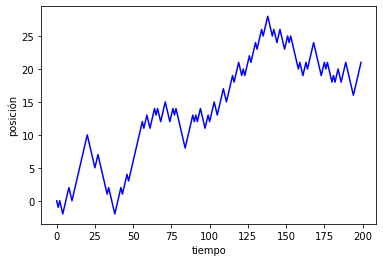

In [175]:
plt.plot(tiempo,posicion, 'b-')
plt.xlabel('tiempo')
plt.ylabel(u'posición')

<div class="alert alert-info">
    
**Ejercicio**: ¿Por qué utilizar una media cuadrática? ¿Qué pasa si hubiésemos usado el promedio simple?
</div>

In [192]:
# Inicialización

pasos = 200
borrachos = 200

posicion = np.zeros([borrachos, pasos])  # todos empiezan en ceros
tiempo = range(steps)

for borracho in range(borrachos):
    for paso in range(1, pasos):
        if random.choice(['adelante', u'atrás']) == u'atrás':
            posicion[borracho, paso] = posicion[borracho,paso - 1] - 1
        else:
            posicion[borracho, paso] = posicion[borracho,paso - 1] + 1
            

promedio = np.mean(posicion, axis=0) # promedio
rms = np.sqrt(np.mean(np.square(posicion), axis=0)) # media cuadrática 
        


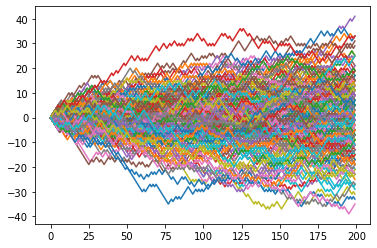

In [193]:
# Todos los borrachos a la vez
for borracho in range(borrachos):
    plt.plot(tiempo, posicion[borracho, :], '-')

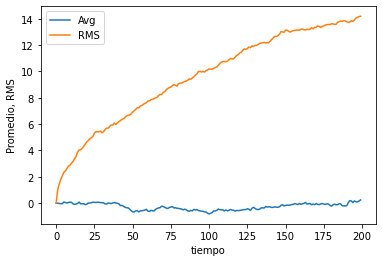

In [194]:
plt.plot(tiempo, promedio, label='Avg')
plt.plot(tiempo, rms, label='RMS')
plt.xlabel('tiempo')
plt.ylabel('Promedio, RMS')
plt.legend(loc='best')

In [208]:
from scipy.optimize import curve_fit

power_law = lambda x, a, b: a*x**b

popt, pcov = curve_fit(power_law, tiempo, rms)

Estamos proponiendo que los datos ajustan a una ley de potencias del tipo 

$$y(t) = a t^b$$

Que en este caso en particualar es:

In [196]:
print("a = %f +/- %f." % (popt[0], sqrt(pcov[0,0])))
print("b = %f +/- %f." % (popt[1], sqrt(pcov[1,1])))

a = 0.952532 +/- 0.014361.
b = 0.514834 +/- 0.003123.


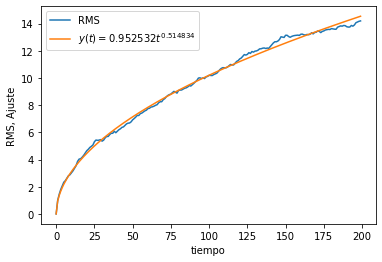

In [204]:
plt.plot(tiempo, rms, label="RMS")
plt.plot(tiempo,power_law(tiempo, popt[0], popt[1]), label=r"$y(t) = %f t ^{%f}$" % (popt[0], popt[1]))
plt.xlabel('tiempo')
plt.ylabel(r'RMS, Ajuste')
plt.legend(loc='best')

# EJEMPLO: DIFUSIÓN

La difusión es el ejemplo con el que iniciamos la discusión, básicamente es una caminata aleatoria en 2D.

(0.0, 200.0)

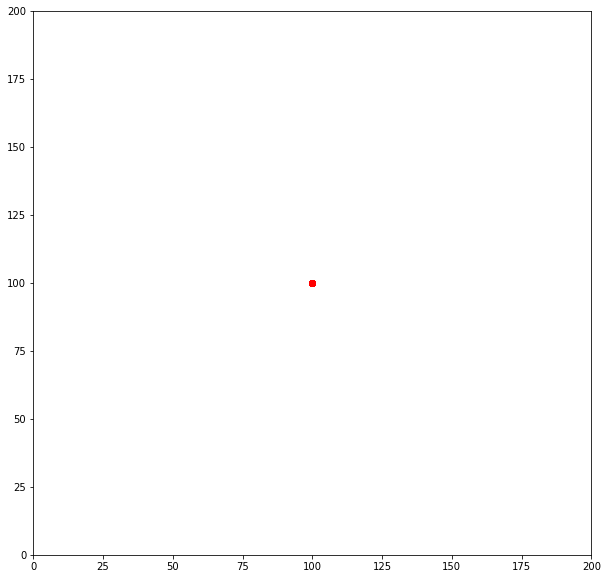

In [217]:
plt.figure(figsize = (10,10))

num_particulas = 400

particulas = np.ones([num_particulas,2])*100  # Todas las partículas en el punto (100,100)


# Dibujamos la posición inicial
line, = plt.plot(particulas[:,0], particulas[:,1], 'ro')
plt.xlim(0,200)
plt.ylim(0,200)


In [219]:
steps = 5000

for i in range(steps):
    for particula in range(num_particulas):
        particulas[particula, 0] += random.randint(-1, 1)
        particulas[particula, 1] += random.randint(-1, 1)
        
        # Verificar colisión
        x, y = (particulas[particula, 0], particulas[particula, 1])
        if x == 200:
            particulas[particula, 0] = 198
        elif x == 0:
            particulas[particula, 0] = 2
        
        if y == 200:
            particulas[particula, 1] = 198
        elif y == 0:
            particulas[particula, 1] = 2
            

(0.0, 200.0)

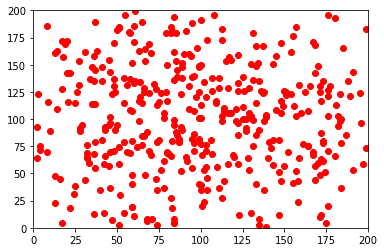

In [220]:
# Dibujamos la posición luego de N steps
line, = plt.plot(particulas[:,0], particulas[:,1], 'ro')
plt.xlim(0,200)
plt.ylim(0,200)

<div class="alert alert-info">
    
**Ejercicio:** ¿Cómo modificarías el código para que pudieras usarlo en una animación?
</div>

<div class="alert alert-info">
    
**Ejercicio:** ¿Y para mostrarlo en un subplot cada 10 pasos?
</div>

In [6]:
%%file er.txt
er=3+5

Writing er.txt


In [2]:
er

8

# Método de euler

Si nos permitimos un poco de _sloppiness_, podemos hacer lo siguiente:

$$
a \equiv\frac{dv}{dt}
$$

$$
dv = a dt
$$

Y reconociendo que tenemos números flotantes con precisión finita:

$$
\Delta v = a \Delta t
$$

Conociendo la posición inicial $x_i$ y el cambio $\delta x$ podemos estimar la nueva velocidad:

$$
v = v_i + a \Delta t
$$

Entonces, haciendo recursivos los _pasos_

$$
v_{i+1} = v_i + \frac{d}{dt}[v] \Delta t
$$

Y podemos hacer lo mismo para la posición:

$$
x_{i+1} = x_i + \frac{d}{dt}[x] \Delta t
$$

Una representación en imagen del método, se muestra a continuación:

<img src="euler_method-Copy1.png">

<div class="alert alert-warning pull-right">
Imagen de Wikipedia
</div>

# Ejemplo: Caída libre

La ecuación de movimiento en caída libre es:

$$
\ddot{x} = -g
$$

donde $g$ es la constante de gravedad.

El método de Euler sólo funciona con ecuaciones diferenciales de primer orden, pero podemos hacer el siguiente truco:

$$ 
\dot{x} = v
$$
$$
\dot{v} = -g
$$

Por lo que ahora nuestro sistema está descrito por dos ecuaciones lineales acopladas de primer orden.

El método de Euler nos dice que la solución de estas ecuaciones es:

$$
x_{i+1} = x_i + \dot{x} \Delta t
$$

$$ 
v_{i+1} = v_i + \dot{v} \Delta t
$$

El cual se puede escribir como

$$
y_{i+1} = y_i + \dot{y} \Delta t
$$

donde 

$$
y = 
\begin{bmatrix}
x \\
v
\end{bmatrix}
$$

y

$$
\dot{y} = 
\begin{bmatrix}
v \\
-g
\end{bmatrix}
$$


In [17]:
def caida_libre(estado, sistema):
    g0 = estado[1]    # primer derivada de x
    g1 = -9.8         # primer derivada de v
    
    return np.array([g0, g1])  # g0 y g1 se convierte en la y

In [18]:
def euler(y, t, dt, derivadas):
    y_next = y + derivadas(y, t)*dt  # estado es la y,  sistema es la t
    return y_next

In [19]:
N = 1000 # número de pasos

x0 = 0.0  # posición inicial

v0 = 0.0  # velocidad inicial

g = -9.8 # aceleración de la gravedad en la tierra

tau = 3.0 # tiempo de la simulación
 
dt = tau/(float)(N-1)  # tamaño del paso

In [20]:
time = np.linspace(0, tau, N)

In [51]:
y = np.zeros([N,2])

y[0,0] = x0
y[0,1] = v0

In [22]:
for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, caida_libre)

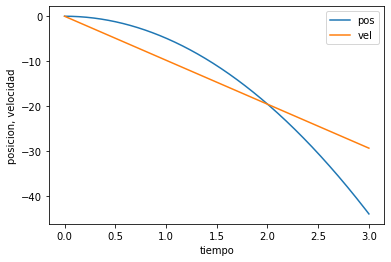

In [23]:
xdata = [y[j,0] for j in range(N)]
vdata = [y[j,1] for j in range(N)]

plt.plot(time, xdata, label="pos")
plt.plot(time, vdata, label="vel")
plt.xlabel("tiempo")
plt.ylabel("posicion, velocidad")
plt.legend(loc="best")

En el caso de la caída libre, es posible obtener una solución exacta:

$$
x(t) = x_i + v_i t + \frac{1}{2}g t^2
$$
$$
v(t) = v_i + gt
$$

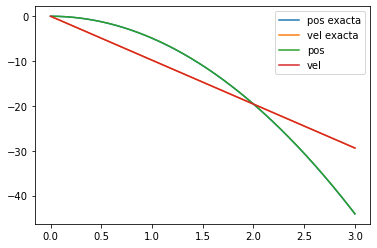

In [24]:
xt = lambda x_i, v_i, a, t: x_i + v_i*a + 0.5*a*t**2
vt = lambda v_i, a, t: v_i + a*t

plt.plot(time, xt(x0, v0, g, time), label="pos exacta")
plt.plot(time, vt(v0, g, time), label="vel exacta")
plt.plot(time, xdata, label="pos")
plt.plot(time, vdata, label="vel")
plt.legend(loc="best")

<div class="alert alert-info">
<font color = red>**Ejercicio:**</font> Define una función `pendulo_analitico` que calcule en función del tiempo la posición del péndulo
</div>
<div class="alert alert-info">
**Ejercicio:** Grafica la solución analítica, con condiciones $\theta_i = 0.2$ y $\omega_i = 0$.
</div>

La ecuación del péndulo, en nuestra aproximación, tiene una solución analítica:

$$
\theta(t) = \theta_i\cos(\Omega t) + \frac{\omega_i}{\Omega} \sin(\Omega t)
$$

In [77]:
def pendulo_analitico(theta=0.2, Omega = omega, t, om=0 ):
    return theta*np.cos(omega*t) + om/omega(np.sin(omega+t))

SyntaxError: non-default argument follows default argument (4009695006.py, line 1)

In [44]:
masa = 1.0 # En kilogramos
longitud = 1.0 # En metros
g = 9.8 # m/s^2

Omega = np.sqrt(g/longitud)
periodo = 2*np.pi/Omega

In [65]:
pt = lambda thet, omeg, t_, om_: thet*np.cos(omeg*t_) + om_/omeg(np.sin(omeg+t_))
pt(0.2, Omega, tiempo, .1)

TypeError: 'numpy.float64' object is not callable

In [67]:
tau = 5*periodo

N = 100

dt = tau/(float)(N-1) 

tiempo = np.linspace(0, tau, num=N)

y = np.zeros([N,2])
y_a = np.zeros([N,1])

In [47]:
pt = lambda thet, omeg,t_, om_: thet*np.cos(omeg*t_)+om_/omeg(np.sin(omeg+t_))
#vt = lambda v_i, a, t: v_i + a*t

plt.plot(tiempo, pt(0.2, Omega, tiempo,0 ), label="pos exacta")
#plt.plot(time, vt(v0, g, time), label="vel exacta")
plt.plot(tiempo, xdata, label="pos")
#plt.plot(time, vdata, label="vel")
plt.legend(loc="best")

TypeError: 'numpy.float64' object is not callable

In [68]:
for j in range(N-1):
    y_a[j+1] = pendulo_analitico(y_a[j])
print(y_a)

TypeError: pendulo_analitico() missing 3 required positional arguments: 'omega', 't', and 'om'

In [33]:
def energia_pendulo(theta, omega, m = masa, g = g, l = longitud):
    return 0.5*m*l**2 * (omega**2 + (g/l)*theta**2)

In [34]:
def pendulo_lineal(estado, tiempo, g=g, l=longitud):
    g0 = estado[1]
    g1 = -g/l*estado[0]
    return np.array([g0, g1])

In [36]:
y[0,0] = 0.2
y[0,1] = 0.0

In [37]:
def pendulo_lineal_euler(y, tiempo, dt):

    for j in range(N-1):
        y[j+1] = euler(y[j], tiempo[j], dt, pendulo_lineal)

        
    theta = np.array([y[j,0] for j in range(N)])
    omega = np.array([y[j,1] for j in range(N)])
    
    return theta, omega

In [38]:
theta_euler, omega_euler = pendulo_lineal_euler(y, tiempo, dt)

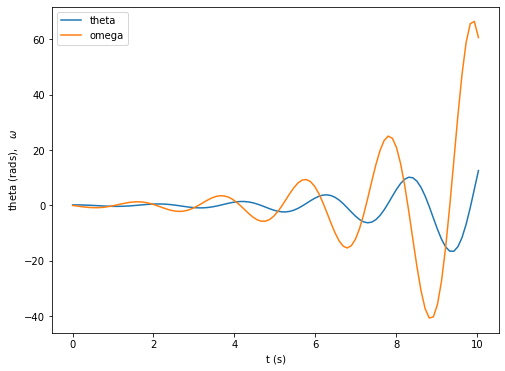

In [39]:
plt.figure(1, figsize=(8,6))
plt.plot(tiempo, theta_euler, label="theta")
plt.plot(tiempo, omega_euler, label="omega")
plt.xlabel(r"t (s)")
plt.ylabel(r"theta (rads),$\quad\omega$")
plt.legend(loc="best")

In [2]:
Derivative(y(t),t,t,t)
x= 0.0
while abs(x -1.0) > 1e-8:
    x = x + 0.1
    print ("x=%19.17g" % (x))

NameError: name 'Derivative' is not defined